# **INFORMASI DATASET**

# I.Import Library

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px
import textwrap
from sklearn.model_selection import GridSearchCV
from scipy import stats
import warnings
from imblearn.over_sampling import SMOTE

# II. Memuat Dataset

In [ ]:
# Load data Train
url_train = '/content/application_train.csv'
df = pd.read_csv(url_train)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...               0.0              0.0              0.0              0.0   
1  ...               0.0              0.0              0.0              0.0   
2  ...               0.0              0.0              0.0              0.0   
3  ...               0.0              0.0              0.0              0.0   
4  ...               0.0              0.0              0.0              0.0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [ ]:
# Load data Train
url_test = '/content/application_test.csv'
df_test = pd.read_csv(url_test)
df_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

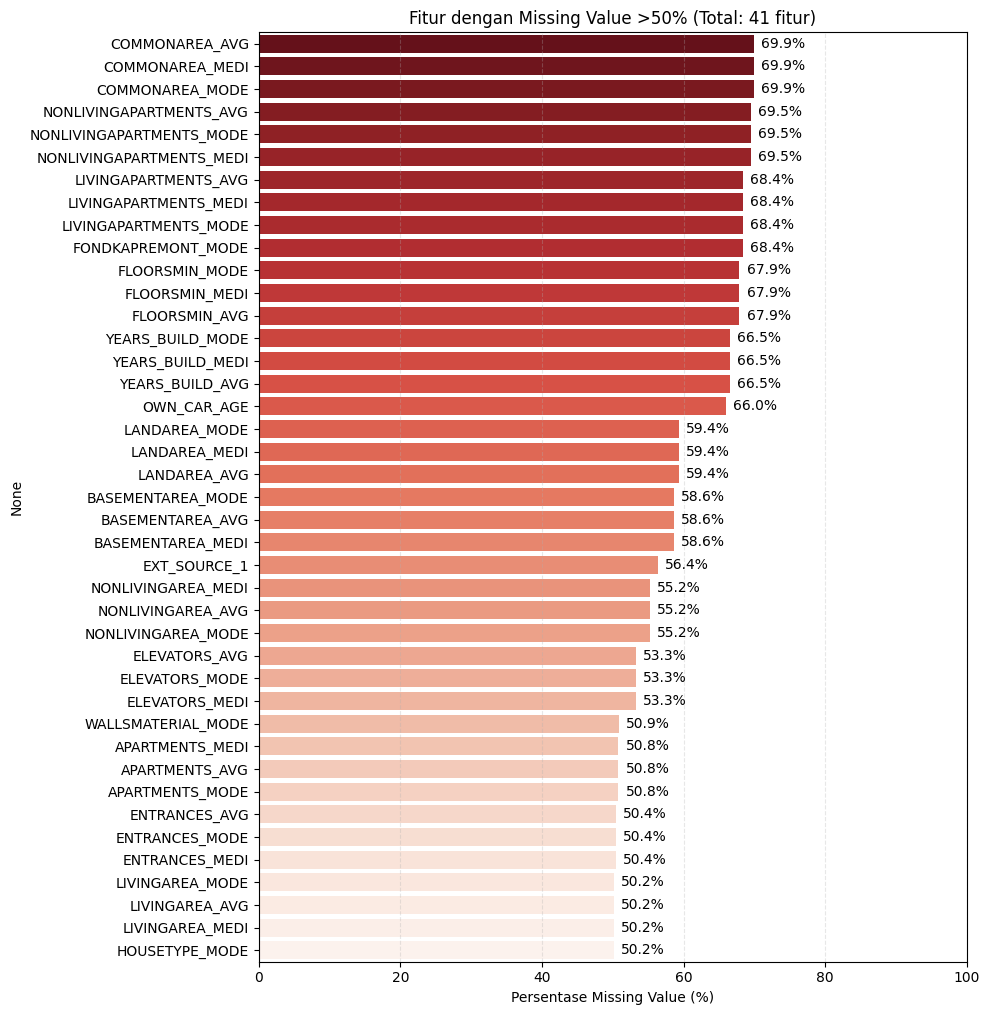

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)
missing_pct = (df.isnull().mean() * 100).round(1)

high_missing = missing_pct[missing_pct > 50].sort_values(ascending=False)

if not high_missing.empty:
    plt.figure(figsize=(10, 0.25 * len(high_missing)))
    ax = sns.barplot(
        x=high_missing.values,
        y=high_missing.index,
        palette='Reds_r',
        orient='h'
    )

    for i, pct in enumerate(high_missing.values):
        ax.text(
            pct + 1,
            i,
            f'{pct}%',
            va='center',
            fontsize=10
        )

    plt.title(f'Fitur dengan Missing Value >50% (Total: {len(high_missing)} fitur)')
    plt.xlabel('Persentase Missing Value (%)')
    plt.xlim(0, 100)
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada fitur dengan missing value >50%")

In [ ]:
threshold = 50
missing_percent = df.isnull().sum() / len(df) * 100

cols_to_drop = missing_percent[missing_percent > threshold].index

df = df.drop(columns=cols_to_drop, inplace=False)

In [ ]:
len(df.columns)

81

## II.A. Visualisasi Data

In [ ]:
app_target = df.pop('TARGET')

#menginisiasi fitur numerik dan kategorik
numeric = df.select_dtypes(include='number').columns
category = df.select_dtypes(include='object').columns

print(f"x shape: {df.shape}")
print(f"y shape: {app_target.shape}")

x shape: (264021, 80)
y shape: (264021,)


In [ ]:
df.describe()

SK_ID_CURR   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  264021.000000  264021.000000      2.640210e+05  2.640210e+05   
mean   252994.532484       0.416993      1.688516e+05  5.989681e+05   
std     88239.454284       0.721792      2.526610e+05  4.023184e+05   
min    100002.000000       0.000000      2.565000e+04  4.500000e+04   
25%    176547.000000       0.000000      1.125000e+05  2.700000e+05   
50%    253105.000000       0.000000      1.462500e+05  5.135310e+05   
75%    329583.000000       1.000000      2.025000e+05  8.086500e+05   
max    405734.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  264009.000000     2.637900e+05               264021.000000   
mean    27110.989006     5.382759e+05                    0.020853   
std     14493.146446     3.692753e+05                    0.013819   
min      1980.000000     4.500000e+04                    0.000290   
25%     16524.000000     2.385000e+05                    0.010006   
50%     24903.000000     4.500000e+05                    0.018850   
75%     34627.500000     6.795000e+05                    0.028663   
max    258025.500000     4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  \
count  264021.000000  264021.000000      264021.000000  ...     264020.000000   
mean   -16039.031297   63858.157124       -4986.943429  ...          0.008068   
std      4367.742374  141314.173110        3523.689007  ...          0.089457   
min    -25201.000000  -17546.000000      -24672.000000  ...          0.000000   
25%    -19687.000000   -2765.000000       -7480.000000  ...          0.000000   
50%    -15751.000000   -1214.000000       -4501.000000  ...          0.000000   
75%    -12412.000000    -289.000000       -2009.000000  ...          0.000000   
max     -7489.000000  365243.000000           0.000000  ...          1.000000   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     264020.000000     264020.000000     264020.000000   
mean           0.000583          0.000477          0.000348   
std            0.024144          0.021841          0.018664   
min            0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               228337.000000              228337.000000   
mean                     0.006482                   0.007055   
std                      0.084811                   0.111831   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               228337.000000              228337.000000   
mean                     0.034510                   0.266759   
std                      0.205962                   0.911629   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              228337.000000               228337.000000  
mean                    0.266207                    1.901948  
std                     0.820786                    1.869421  
min                     0.000000            

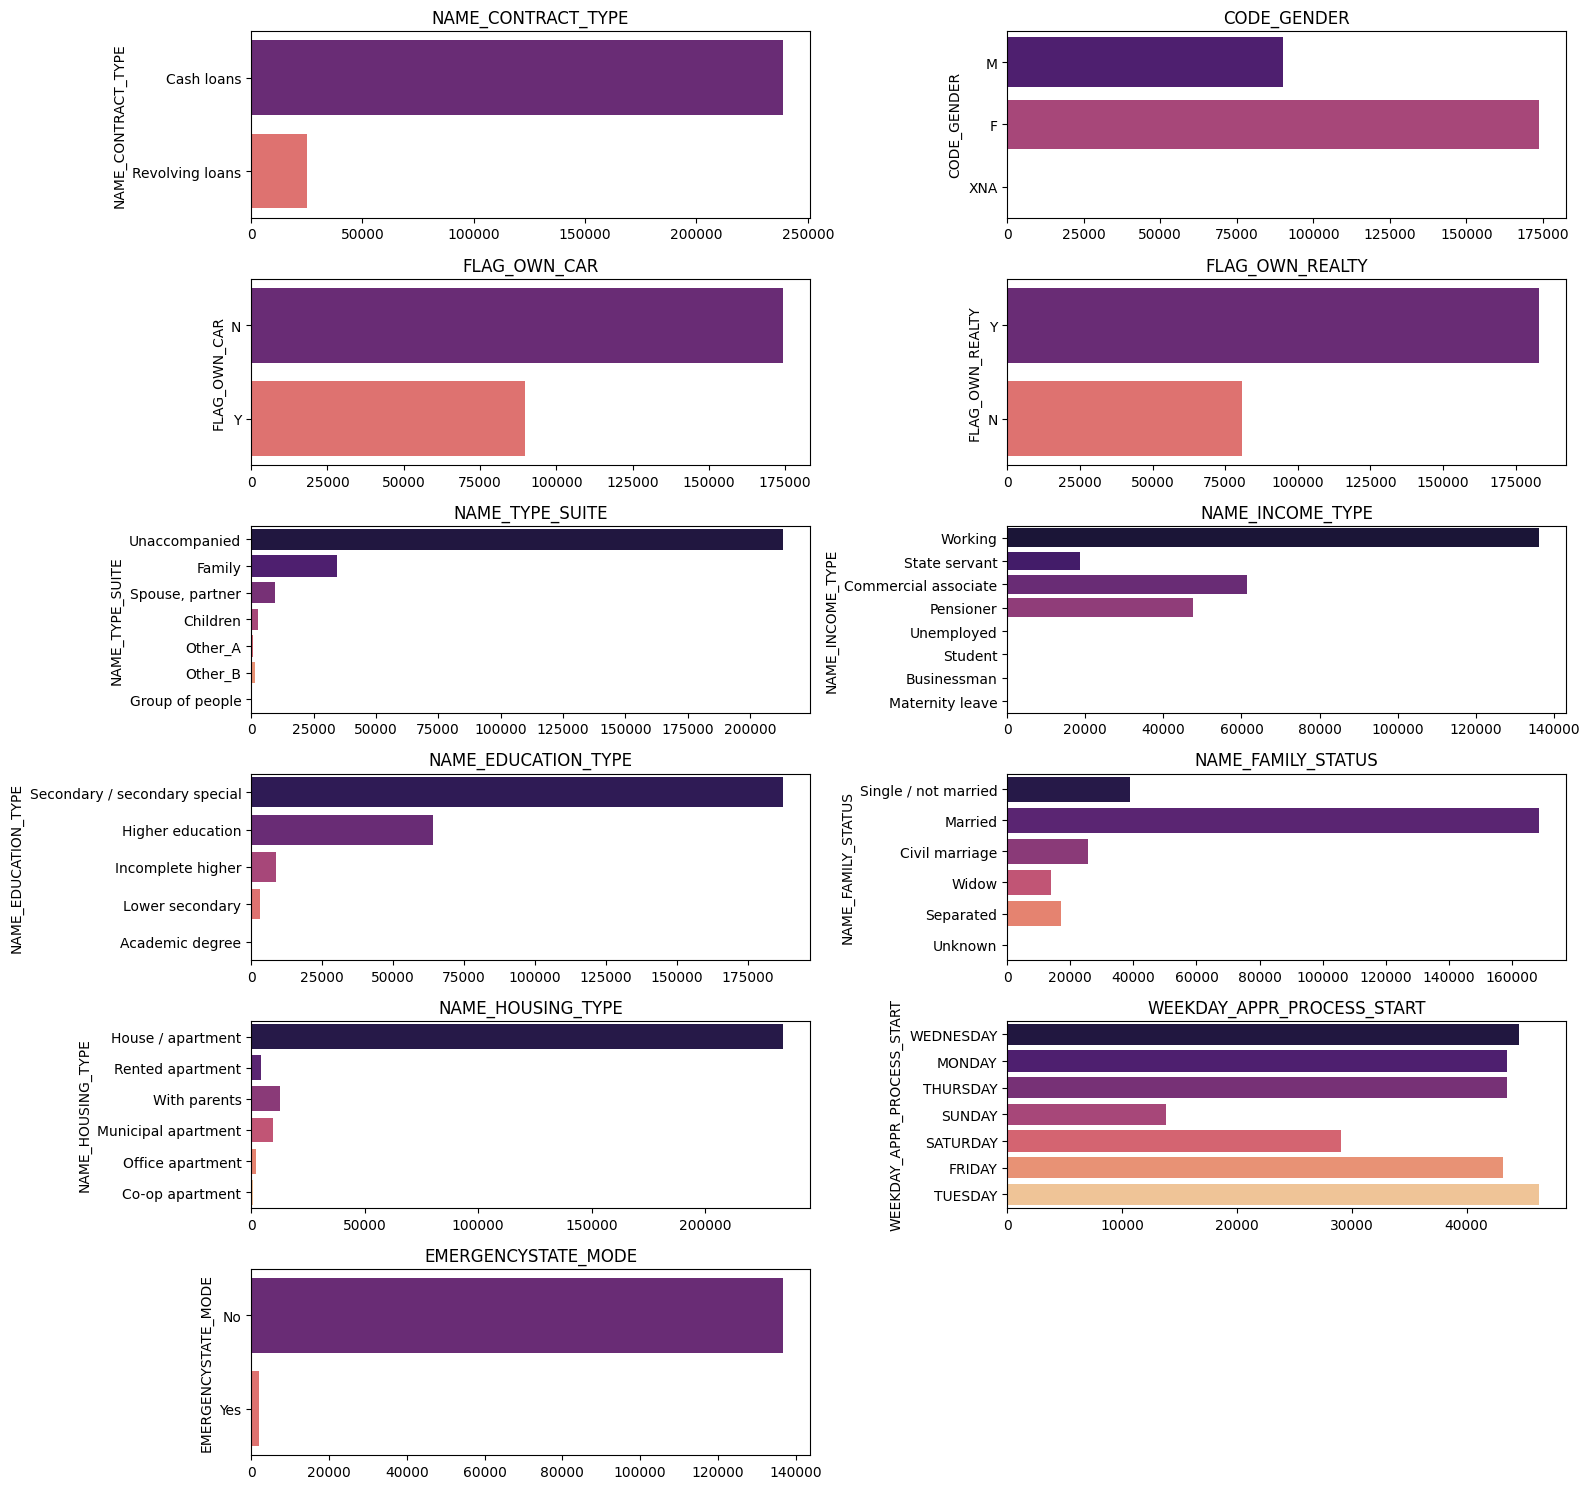

In [ ]:
df_cat = df[category].drop(columns=['OCCUPATION_TYPE', 'ORGANIZATION_TYPE'])

warnings.simplefilter(action='ignore', category=FutureWarning)
n_cols = 2
n_rows = math.ceil(len(df_cat.columns) / n_cols)

plt.figure(figsize=(16, n_rows * 2.5))

for i, col in enumerate(df_cat.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(y=df[col], palette='magma')
    plt.title(col)
    plt.xlabel('')
    plt.tight_layout()

plt.show()


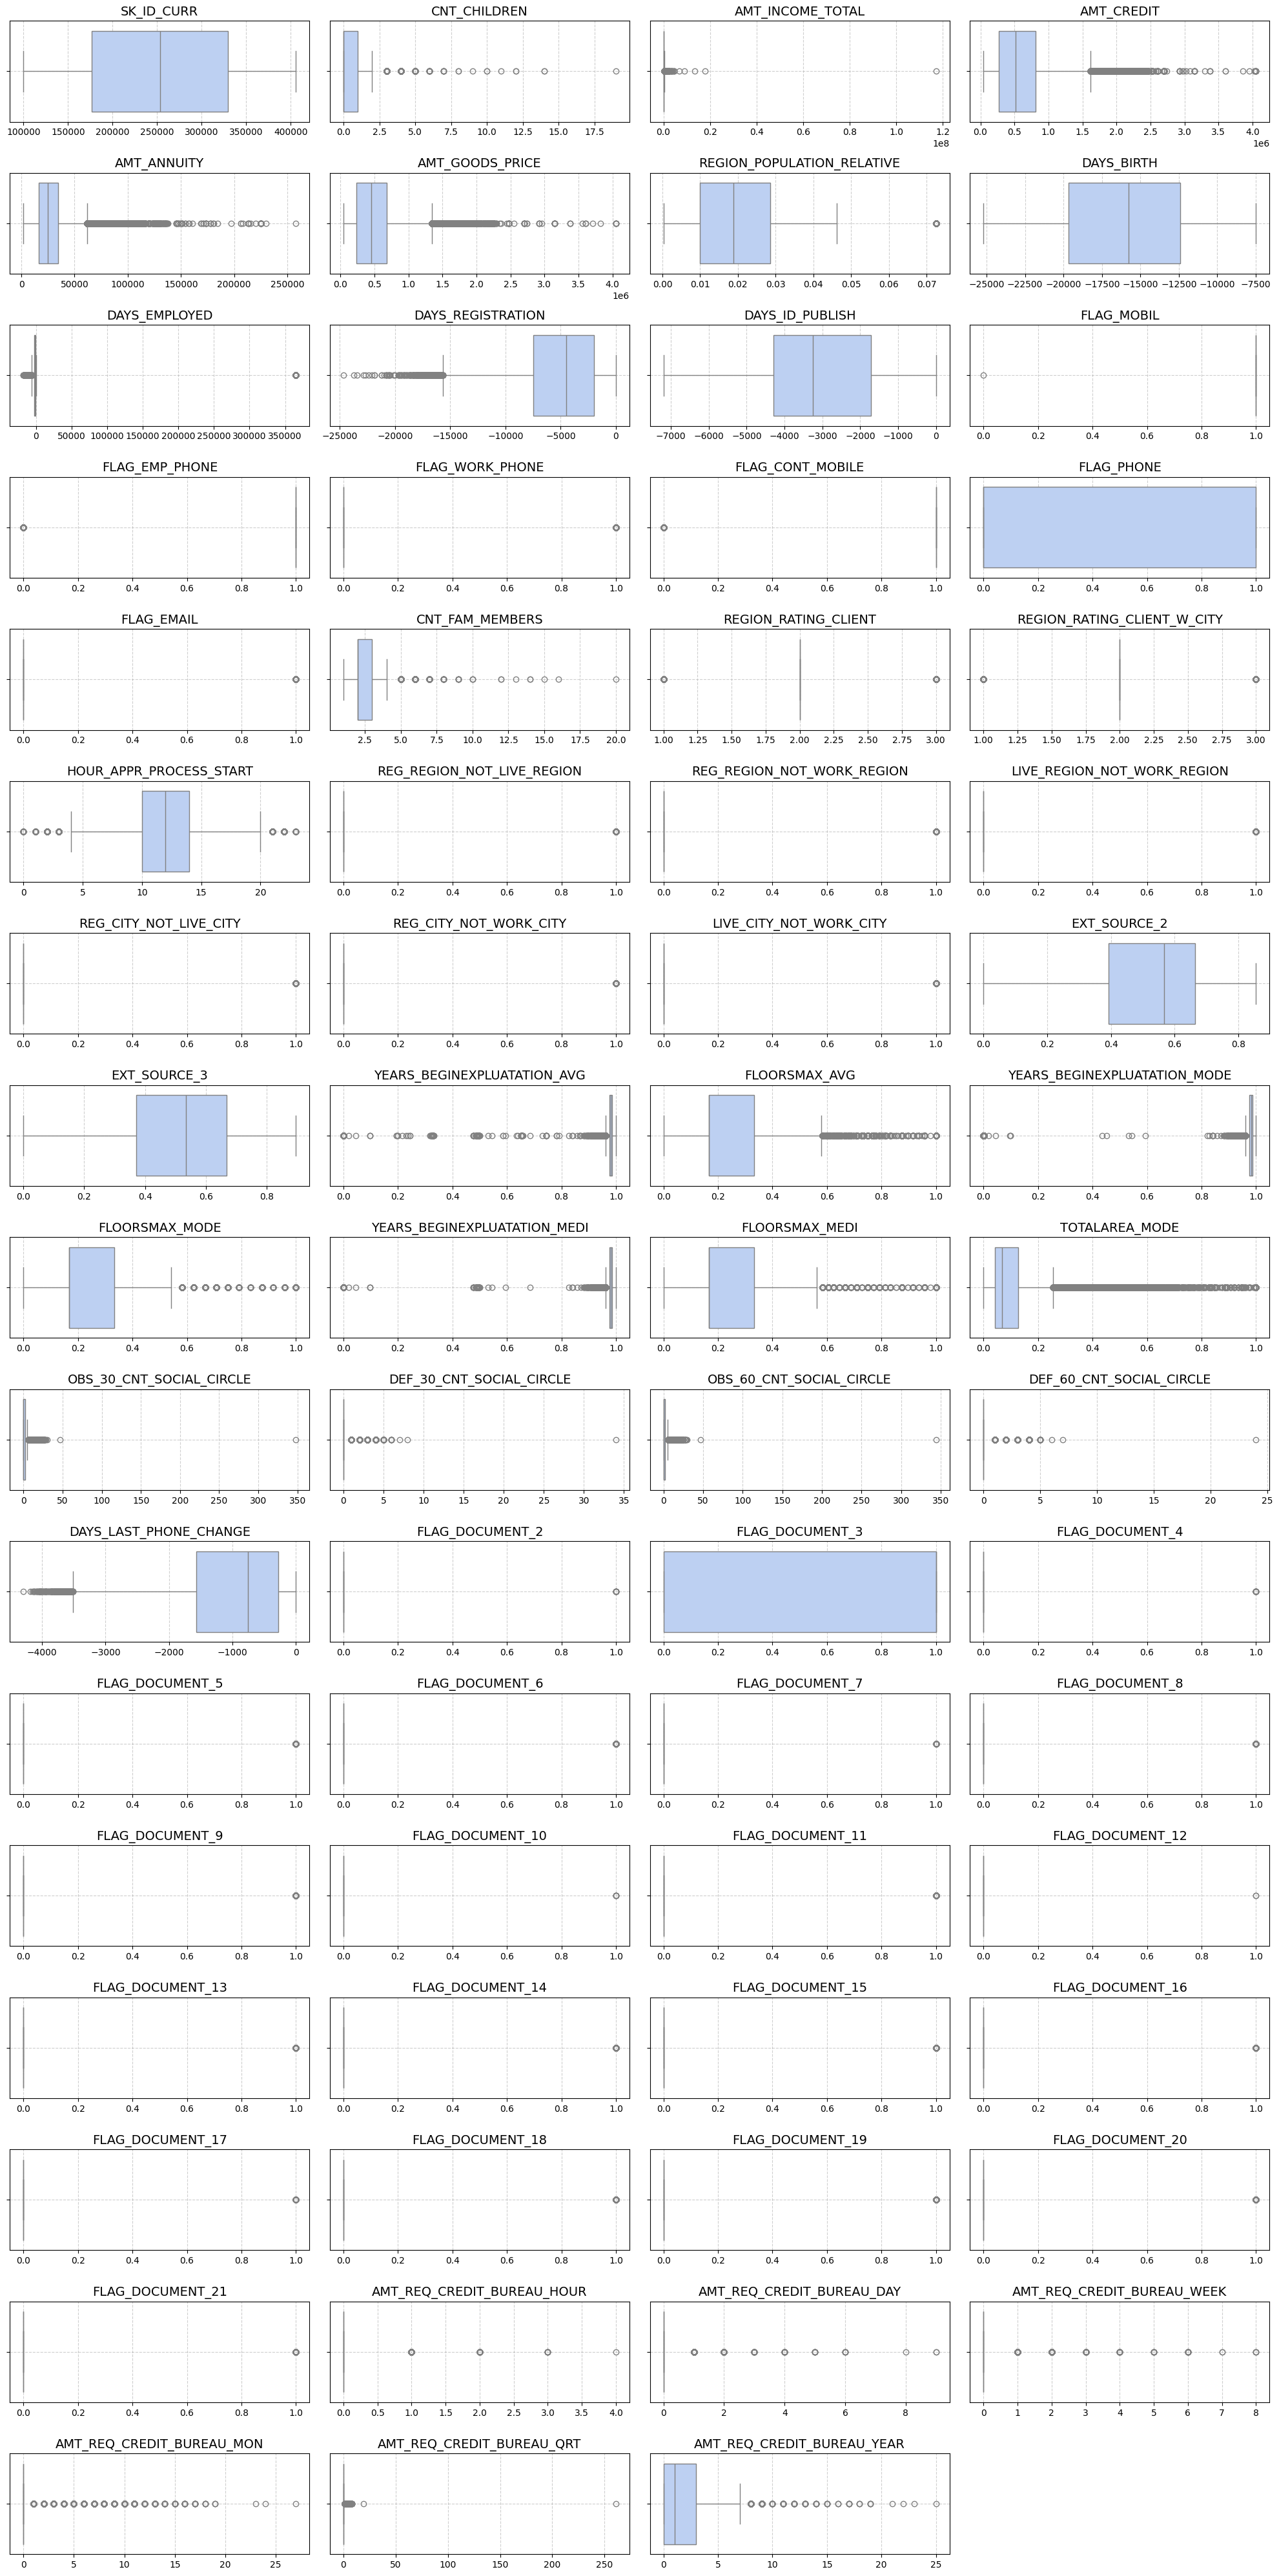

In [ ]:
plt.figure(figsize=(20, 40))  # Sesuaikan ukuran berdasarkan jumlah fitur
for i in range(len(numeric)):
    plt.subplot(len(numeric) // 4 + 1, 4, i + 1)  # Atur grid agar tetap rapi
    sns.boxplot(x=df[numeric[i]], color=sns.color_palette("coolwarm", 10)[3])  # Warna lebih menarik
    plt.title(numeric[i], fontsize=14)
    plt.xlabel('')
    plt.grid(True, linestyle="--", alpha=0.6)  # Tambahkan grid agar lebih jelas

plt.tight_layout()
plt.show()

In [ ]:
# Gabungkan kembali fitur dengan target
df = pd.concat([df, app_target], axis=1)

# Hapus kolom dengan 0 variance agar tidak menyebabkan warning/error
numeric_filtered = [col for col in numeric if df[col].nunique() > 1]

In [ ]:
list_col = {
    "NAME_TYPE_SUITE - Group of people": (df['NAME_TYPE_SUITE'] == "Group of people").sum(),
    "NAME_EDUCATION_TYPE - Academic degree": (df['NAME_EDUCATION_TYPE'] == "Academic degree").sum(),
    "NAME_INCOME_TYPE - Maternity leave": (df['NAME_INCOME_TYPE'] == "Maternity leave").sum(),
    "NAME_INCOME_TYPE - Businessman": (df['NAME_INCOME_TYPE'] == "Businessman").sum(),
    "NAME_INCOME_TYPE - Student": (df['NAME_INCOME_TYPE'] == "Student").sum(),
    "NAME_INCOME_TYPE - Unemployed": (df['NAME_INCOME_TYPE'] == "Unemployed").sum(),
    "NAME_FAMILY_STATUS - Unknown": (df['NAME_FAMILY_STATUS'] == "Unknown").sum(),
}

for key, value in list_col.items():
    print(f"{key}: {value}")

NAME_TYPE_SUITE - Group of people: 228
NAME_EDUCATION_TYPE - Academic degree: 139
NAME_INCOME_TYPE - Maternity leave: 3
NAME_INCOME_TYPE - Businessman: 9
NAME_INCOME_TYPE - Student: 16
NAME_INCOME_TYPE - Unemployed: 20
NAME_FAMILY_STATUS - Unknown: 2


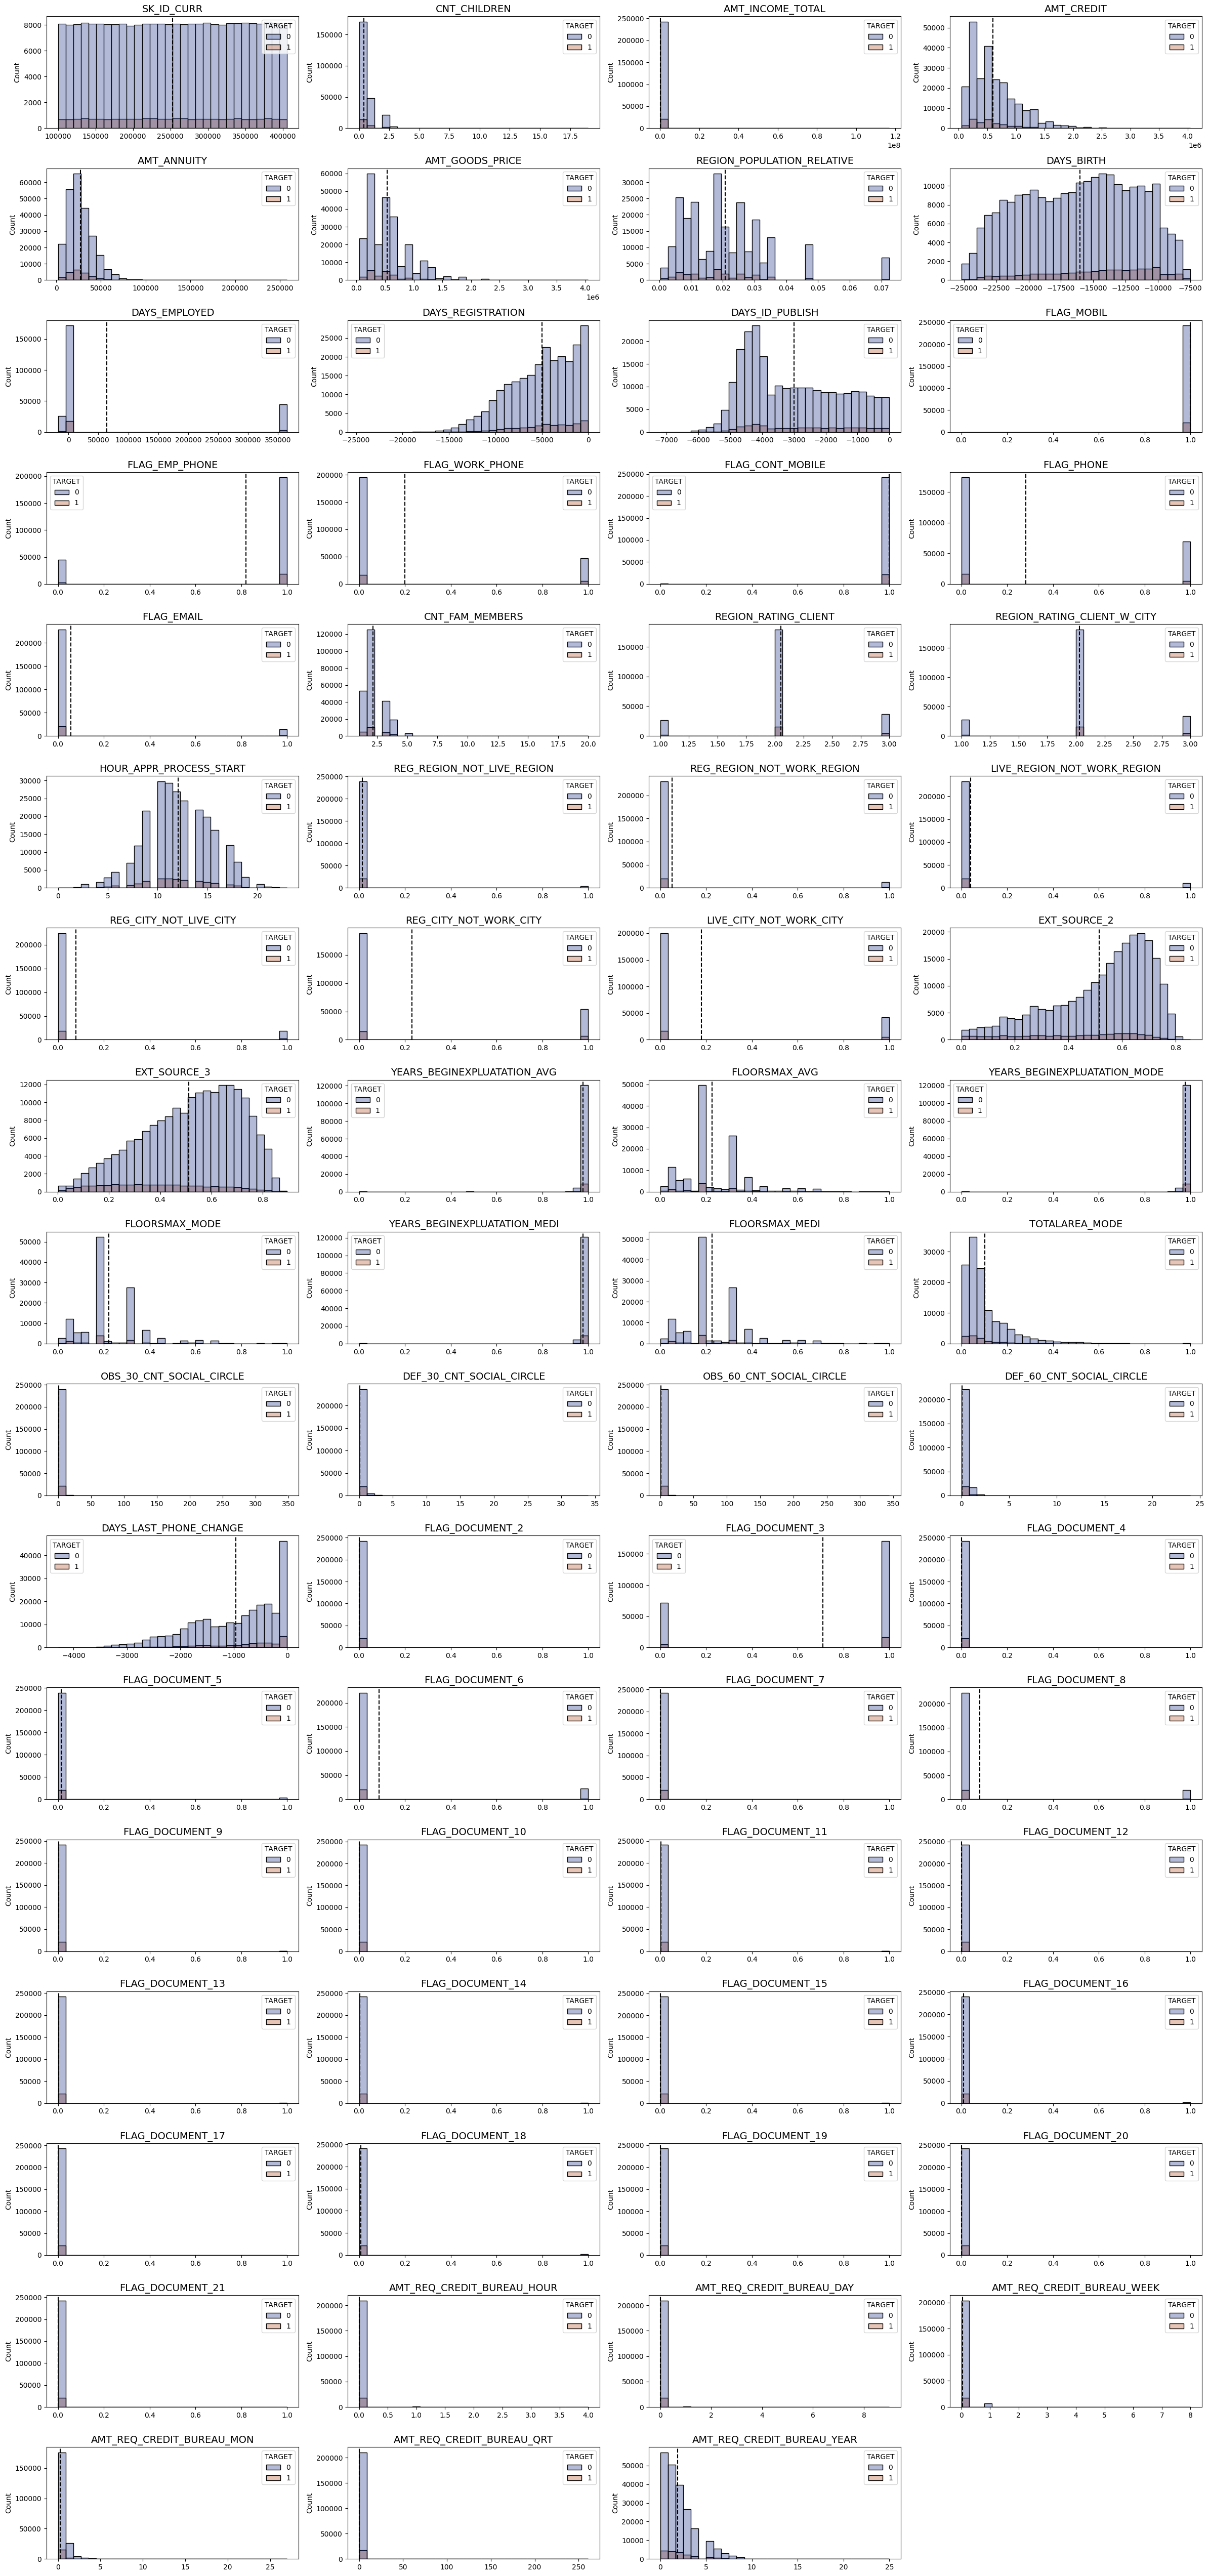

In [ ]:
warnings.simplefilter(action='ignore', category=UserWarning)

n_cols = 4
n_rows = (len(numeric_filtered) // n_cols) + 1

plt.figure(figsize=(24, n_rows * 3))

for i, col in enumerate(numeric_filtered):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=df, x=col, hue='TARGET', kde=False, bins=30, palette='dark', alpha=0.3)
    plt.axvline(df[col].mean(), color='black', linestyle='--', linewidth=1.5)
    plt.title(col, fontsize=14)
    plt.xlabel('')
    plt.tight_layout()

plt.show()

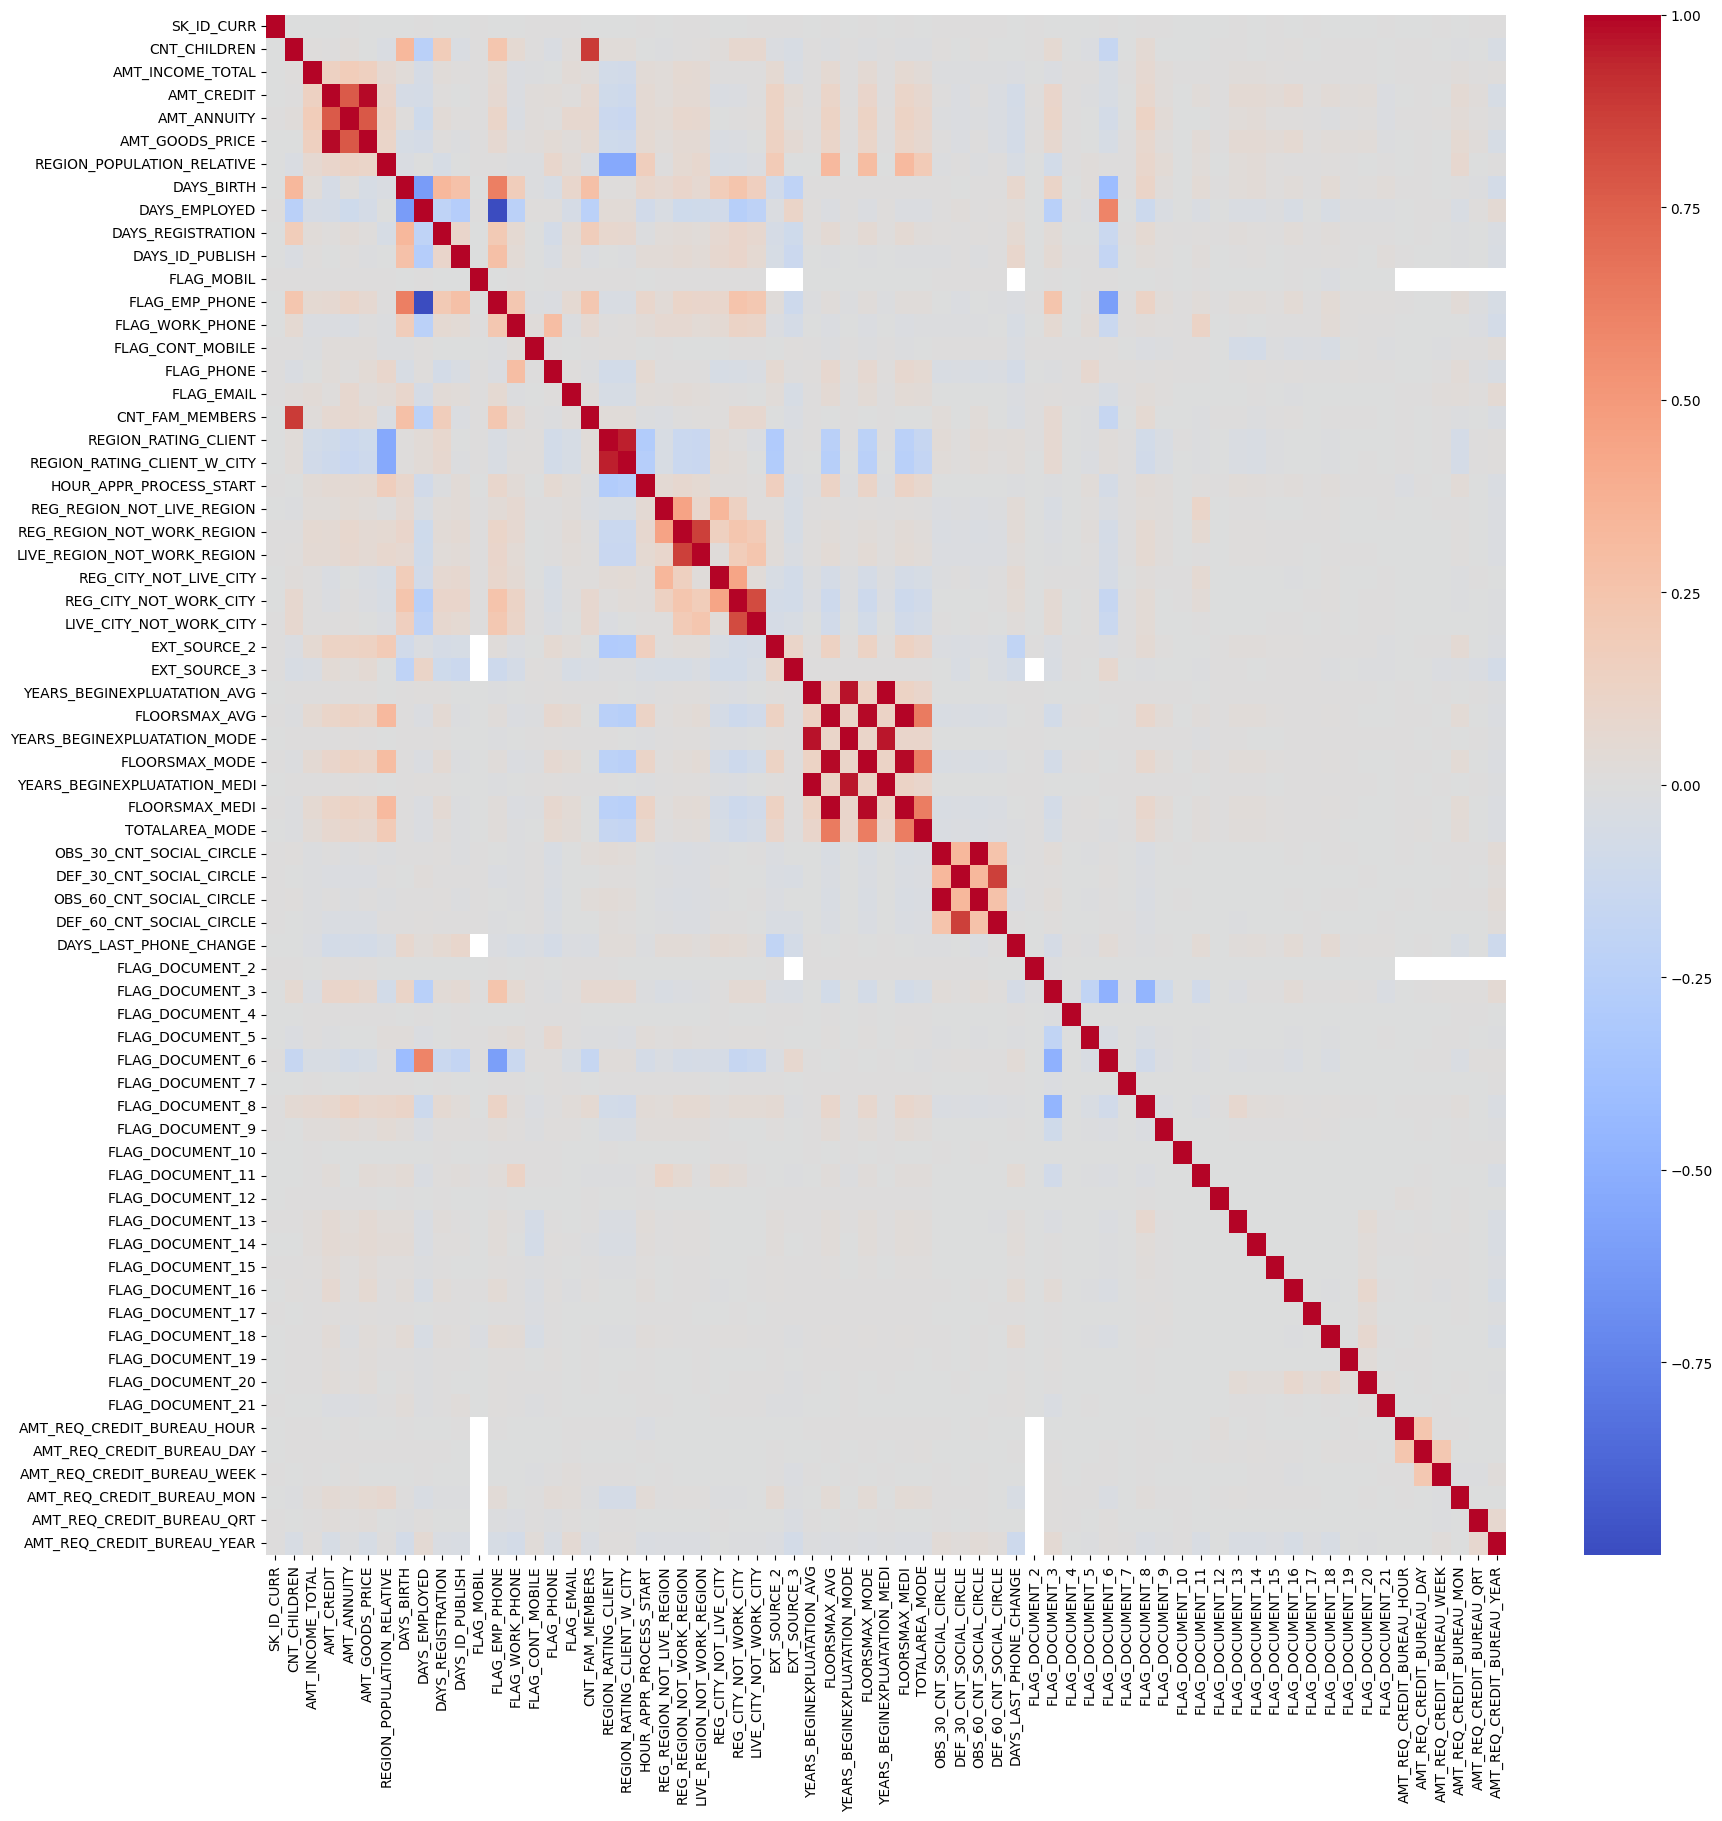

In [ ]:
plt.figure(figsize =(20,20))
sns.heatmap(df[numeric].corr(), cmap='coolwarm', annot=False, fmt='.2f')
plt.show()

# III. Pembersihan dan Pra Pemrosesan Data

## III.A Menghapus kolom tidak relevan

In [ ]:
data = df.drop(columns=['SK_ID_CURR', 'ORGANIZATION_TYPE'], axis=1)

In [ ]:
len(data.columns)

79

## III.B Handling Missing Values

In [ ]:
columns_with_null = data.columns[data.isnull().any()].tolist()

missing_data = pd.DataFrame({
    'Column Name': columns_with_null,
    'Missing Values': [data[col].isnull().sum() for col in columns_with_null],
    'Data Type': [data[col].dtype for col in columns_with_null]
})

missing_data

Column Name  Missing Values Data Type
0                    AMT_ANNUITY              12   float64
1                AMT_GOODS_PRICE             231   float64
2                NAME_TYPE_SUITE            1086    object
3                OCCUPATION_TYPE           82743    object
4                CNT_FAM_MEMBERS               2   float64
5                   EXT_SOURCE_2             570   float64
6                   EXT_SOURCE_3           52395   float64
7    YEARS_BEGINEXPLUATATION_AVG          128855   float64
8                  FLOORSMAX_AVG          131467   float64
9   YEARS_BEGINEXPLUATATION_MODE          128855   float64
10                FLOORSMAX_MODE          131467   float64
11  YEARS_BEGINEXPLUATATION_MEDI          128855   float64
12                FLOORSMAX_MEDI          131468   float64
13                TOTALAREA_MODE          127515   float64
14           EMERGENCYSTATE_MODE          125203    object
15      OBS_30_CNT_SOCIAL_CIRCLE             877   float64
16      DEF_30_CNT_SOCIAL_CIRCLE             877   float64
17      OBS_60_CNT_SOCIAL_CIRCLE             877   float64
18      DEF_60_CNT_SOCIAL_CIRCLE             877   float64
19        DAYS_LAST_PHONE_CHANGE               2   float64
20               FLAG_DOCUMENT_2               1   float64
21               FLAG_DOCUMENT_3               1   float64
22               FLAG_DOCUMENT_4               1   float64
23               FLAG_DOCUMENT_5               1   float64
24               FLAG_DOCUMENT_6               1   float64
25               FLAG_DOCUMENT_7               1   float64
26               FLAG_DOCUMENT_8               1   float64
27               FLAG_DOCUMENT_9               1   float64
28              FLAG_DOCUMENT_10               1   float64
29              FLAG_DOCUMENT_11               1   float64
30              FLAG_DOCUMENT_12               1   float64
31              FLAG_DOCUMENT_13               1   float64
32              FLAG_DOCUMENT_14               1   float64
33              FLAG_DOCUMENT_15               1   float64
34              FLAG_DOCUMENT_16               1   float64
35              FLAG_DOCUMENT_17               1   float64
36              FLAG_DOCUMENT_18               1   float64
37              FLAG_DOCUMENT_19               1   float64
38              FLAG_DOCUMENT_20               1   float64
39              FLAG_DOCUMENT_21               1   float64
40    AMT_REQ_CREDIT_BUREAU_HOUR           35684   float64
41     AMT_REQ_CREDIT_BUREAU_DAY           35684   float64
42    AMT_REQ_CREDIT_BUREAU_WEEK           35684   float64
43     AMT_REQ_CREDIT_BUREAU_MON           35684   float64
44     AMT_REQ_CREDIT_BUREAU_QRT           35684   float64
45    AMT_REQ_CREDIT_BUREAU_YEAR           35684   float64

In [ ]:
def handle_missing_values(df, threshold_drop=0.5, fill_cat='mode'):
    df = df.copy()

    # Step 1: Drop columns with too many missing values
    #missing_fraction = df.isnull().mean()
    #cols_to_drop = missing_fraction[missing_fraction > threshold_drop].index
    #df.drop(columns=cols_to_drop, inplace=True)

    # Step 2: Fill numeric columns based on skewness
    num_cols = df.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        if df[col].isnull().sum() > 0:
            skew_val = df[col].skew()
            if abs(skew_val) > 1:
                df[col].fillna(df[col].median(), inplace=True)
            else:
                df[col].fillna(df[col].mean(), inplace=True)

    # Step 3: Fill categorical columns
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        if df[col].isnull().sum() > 0:
            if fill_cat == 'mode':
                df[col].fillna(df[col].mode()[0], inplace=True)

    return df

In [ ]:
#menyimpan pada dataframe pemodelan
data = handle_missing_values(data).reset_index(drop=True)

#mengecek kembali missing values apakah sudah teratasi
data.isnull().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
                             ..
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
TARGET                        0
Length: 79, dtype: int64

## III.C Data Duplikat

In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
print(data.duplicated().sum())

0


III. Data Outlier

In [ ]:
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
data['NAME_INCOME_TYPE'].replace(
    {"Maternity leave": "Unemployed", "Student": "Unemployed", "Businessman": "Working"},
    inplace=True
)

data['NAME_FAMILY_STATUS'].replace(
    {"Unknown": "Married"},
    inplace=True
)

data['CODE_GENDER'].replace(
    {"XNA": "F"},
    inplace=True
)

In [ ]:
len(data.columns)

79

In [ ]:
data.head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0         Cash loans           M            N               Y             0   
1         Cash loans           F            N               N             0   
2    Revolving loans           M            Y               Y             0   
3         Cash loans           F            N               Y             0   
4         Cash loans           M            N               Y             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          202500.0    406597.5      24700.5         351000.0   Unaccompanied   
1          270000.0   1293502.5      35698.5        1129500.0          Family   
2           67500.0    135000.0       6750.0         135000.0   Unaccompanied   
3          135000.0    312682.5      29686.5         297000.0   Unaccompanied   
4          121500.0    513000.0      21865.5         513000.0   Unaccompanied   

   ... FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...              0.0              0.0              0.0   
1  ...              0.0              0.0              0.0   
2  ...              0.0              0.0              0.0   
3  ...              0.0              0.0              0.0   
4  ...              0.0              0.0              0.0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  TARGET  
0                        0.0                         1.0       1  
1                        0.0                         0.0       0  
2                        0.0                         0.0       0  
3                        0.0                         1.0       0  
4                        0.0                         0.0       0  

[5 rows x 79 columns]

## III.D Feature Engineering

In [ ]:
data['AGE'] = round((data['DAYS_BIRTH'] / 365).abs(), 0).astype(int)
data['YEAR_EMP'] = round((data['DAYS_EMPLOYED'] / 365).abs(), 0).astype(int)
data['YEAR_REGISTERED'] = round((data['DAYS_REGISTRATION'] / 365).abs(), 0).astype(int)
data['YEAR_PUBLISHED'] = round((data['DAYS_ID_PUBLISH'] / 365).abs(), 0).astype(int)
data['YEAR_LAST_PHONE_CHANGE'] = round((data['DAYS_LAST_PHONE_CHANGE'] / 365).abs(), 0).astype(int)

data['TOTAL_CREDIT_INQUIRIES'] = (
    data['AMT_REQ_CREDIT_BUREAU_HOUR'] +
    data['AMT_REQ_CREDIT_BUREAU_DAY'] +
    data['AMT_REQ_CREDIT_BUREAU_WEEK'] +
    data['AMT_REQ_CREDIT_BUREAU_MON'] +
    data['AMT_REQ_CREDIT_BUREAU_QRT'] +
    data['AMT_REQ_CREDIT_BUREAU_YEAR']
)

data = data.drop([
    'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
], axis=1)

## III.E Scaling Fitur Numerik

In [ ]:
# Pilih semua kolom numerik, tapi exclude kolom target
numeric_scaling = data.select_dtypes(include='number').columns
numeric_scaling = numeric_scaling.drop('TARGET')

In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
scaler = StandardScaler()
data[numeric_scaling] = scaler.fit_transform(data[numeric_scaling])

print("Dataset berhasil dimuat dengan shape:", data.shape)

Dataset berhasil dimuat dengan shape: (264021, 74)


In [ ]:
data.head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0         Cash loans           M            N               Y     -0.577721   
1         Cash loans           F            N               N     -0.577721   
2    Revolving loans           M            Y               Y     -0.577721   
3         Cash loans           F            N               Y     -0.577721   
4         Cash loans           M            N               Y     -0.577721   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          0.133176   -0.478156    -0.166316        -0.507145   Unaccompanied   
1          0.400333    1.726334     0.592543         1.601912          Family   
2         -0.401137   -1.153238    -1.404897        -1.092317   Unaccompanied   
3         -0.133981   -0.711591     0.177717        -0.653438   Unaccompanied   
4         -0.187412   -0.213682    -0.361931        -0.068266   Unaccompanied   

   ... FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 TARGET       AGE  \
0  ...        -0.024158        -0.021851         -0.01867      1 -1.498534   
1  ...        -0.024158        -0.021851         -0.01867      0  0.171662   
2  ...        -0.024158        -0.021851         -0.01867      0  0.672721   
3  ...        -0.024158        -0.021851         -0.01867      0  0.672721   
4  ...        -0.024158        -0.021851         -0.01867      0  0.923250   

   YEAR_EMP  YEAR_REGISTERED  YEAR_PUBLISHED  YEAR_LAST_PHONE_CHANGE  \
0 -0.480649        -0.379007       -0.529308                0.160495   
1 -0.478033        -1.103535       -1.733109               -0.277947   
2 -0.483265        -0.172000       -0.288548               -0.277947   
3 -0.464953         1.380559       -0.288548               -0.277947   
4 -0.464953        -0.172000        0.192972                0.160495   

   TOTAL_CREDIT_INQUIRIES  
0               -0.584538  
1               -1.040307  
2               -1.040307  
3               -0.584538  
4               -1.040307  

[5 rows x 74 columns]

## III.F Encoding Fitur kategorik

In [ ]:
category = data.select_dtypes(include='object').columns
# Encoding Data Kategorikal
label_encoders = {}

# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
scaler = StandardScaler()
data[numeric_scaling] = scaler.fit_transform(data[numeric_scaling])

for col in category:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Menyimpan encoder jika diperlukan nanti

In [ ]:
data.head()

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                   0            1             0                1   
1                   0            0             0                0   
2                   1            1             1                1   
3                   0            0             0                1   
4                   0            1             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0     -0.577721          0.133176   -0.478156    -0.166316        -0.507145   
1     -0.577721          0.400333    1.726334     0.592543         1.601912   
2     -0.577721         -0.401137   -1.153238    -1.404897        -1.092317   
3     -0.577721         -0.133981   -0.711591     0.177717        -0.653438   
4     -0.577721         -0.187412   -0.213682    -0.361931        -0.068266   

   NAME_TYPE_SUITE  ...  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0                6  ...         -0.024158         -0.021851          -0.01867   
1                1  ...         -0.024158         -0.021851          -0.01867   
2                6  ...         -0.024158         -0.021851          -0.01867   
3                6  ...         -0.024158         -0.021851          -0.01867   
4                6  ...         -0.024158         -0.021851          -0.01867   

   TARGET       AGE  YEAR_EMP  YEAR_REGISTERED  YEAR_PUBLISHED  \
0       1 -1.498534 -0.480649        -0.379007       -0.529308   
1       0  0.171662 -0.478033        -1.103535       -1.733109   
2       0  0.672721 -0.483265        -0.172000       -0.288548   
3       0  0.672721 -0.464953         1.380559       -0.288548   
4       0  0.923250 -0.464953        -0.172000        0.192972   

   YEAR_LAST_PHONE_CHANGE  TOTAL_CREDIT_INQUIRIES  
0                0.160495               -0.584538  
1               -0.277947               -1.040307  
2               -0.277947               -1.040307  
3               -0.277947               -0.584538  
4                0.160495               -1.040307  

[5 rows x 74 columns]

In [ ]:
data.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTA

# IV. membangun model

In [ ]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['TARGET'])
y = data['TARGET']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(211216, 73), y_train=(211216,)
Test set shape: X_test=(52805, 73), y_test=(52805,)


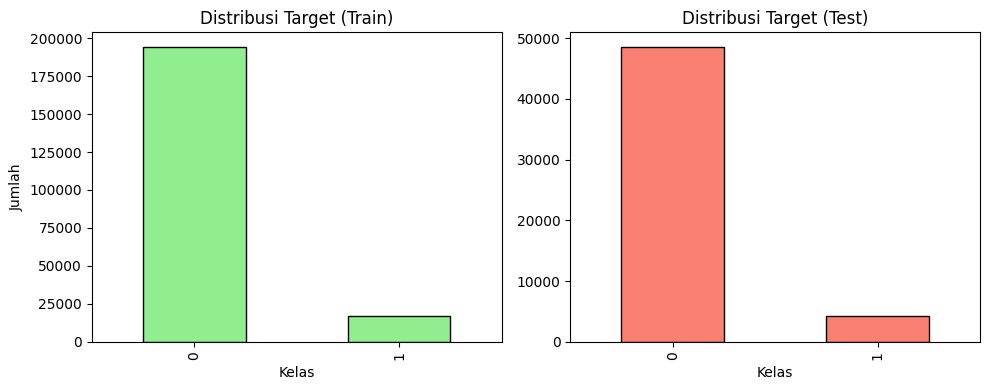

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

y_train.value_counts().plot(kind='bar', ax=axes[0], color='lightgreen', edgecolor='black')
axes[0].set_title('Distribusi Target (Train)')
axes[0].set_xlabel('Kelas')
axes[0].set_ylabel('Jumlah')

y_test.value_counts().plot(kind='bar', ax=axes[1], color='salmon', edgecolor='black')
axes[1].set_title('Distribusi Target (Test)')
axes[1].set_xlabel('Kelas')

plt.tight_layout()
plt.show()


Distribusi sesudah SMOTE: Counter({0: 194096, 1: 194096})


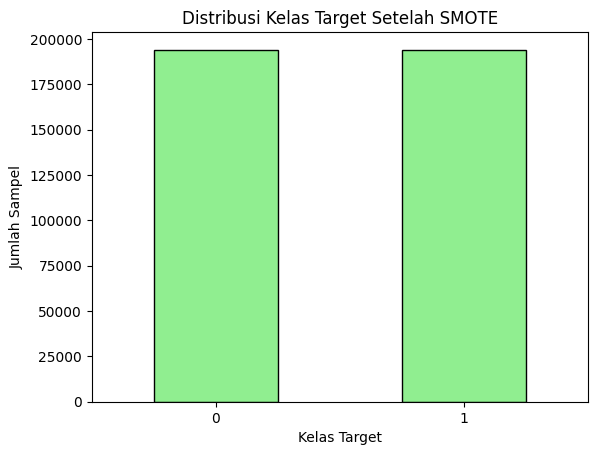

In [ ]:
from collections import Counter

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE hanya pada data training
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Cek distribusi sesudah SMOTE
print("Distribusi sesudah SMOTE:", Counter(y_train_res))

# Sesudah SMOTE
# Visualisasi hasil resampling
pd.Series(y_train_res).value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title('Distribusi Kelas Target Setelah SMOTE')
plt.xlabel('Kelas Target')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)
plt.show()



In [ ]:
# membuat dataframe untuk menyimpan hasil evaluasi
stem_model_eval_tts_train = pd.DataFrame(columns=['Accuracy'])
stem_model_eval_tts_test = pd.DataFrame(columns=['Accuracy'])

## IV.A Algoritma Logistik Regression (Dengan smote)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train_res, y_train_res)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train_res)
y_pred_test_lr = logistic_regression.predict(X_test)

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = round(accuracy_score(y_pred_train_lr, y_train_res)*100,1)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = round(accuracy_score(y_pred_test_lr, y_test)*100,1)

In [ ]:
# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 73.3
Logistic Regression - accuracy_test: 70.9


In [ ]:
#Save Evaluation
stem_model_eval_tts_train.loc['Logistik Train smote 80%'] = [accuracy_train_lr]
stem_model_eval_tts_test.loc['Logistik Test smote 20%'] = [accuracy_test_lr]

## IV.B Algoritma Logistik Regression tanpa smote

In [ ]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression_no = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression_no.fit(X_train, y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression_no.predict(X_train)
y_pred_test_lr = logistic_regression_no.predict(X_test)

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lrn = round(accuracy_score(y_pred_train_lr, y_train)*100,1)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lrn = round(accuracy_score(y_pred_test_lr, y_test)*100,1)

In [ ]:
# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lrn)
print('Logistic Regression - accuracy_test:', accuracy_test_lrn)

Logistic Regression - accuracy_train: 91.9
Logistic Regression - accuracy_test: 91.9


In [ ]:
#Save Evaluation
stem_model_eval_tts_train.loc['Logistik Train 80%'] = [accuracy_train_lrn]
stem_model_eval_tts_test.loc['Logistik Test 20%'] = [accuracy_test_lrn]

In [ ]:
!pip install catboost
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 18.0 MB/s eta 0:00:00


## IV.C Algoritma Catboost

In [ ]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate',0.001, 0.27),
        'depth': trial.suggest_int('depth', 3, 10),
        'random_strength': trial.suggest_int('random_strength', 1, 10)
    }

    # Create the cat classifier with the suggested hyperparameters
    cat = CatBoostClassifier(**params)

    # Train the classifier and evaluate on the validation set
    cat.fit(X_train_res, y_train_res)
    accuracy = cat.score(X_test, y_test)
    return accuracy

# Run the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50,timeout=300*12)

# Print the best hyperparameters and the corresponding accuracy
best_params = study.best_params
best_accuracy = study.best_value
print('Best Hyperparameters:', best_params)
print('Best Accuracy:', best_accuracy)


[I 2025-11-02 09:21:28,458] A new study created in memory with name: no-name-6ec995ae-500f-4bd3-9ed0-ce037a573583


0:	learn: 0.6332813	total: 209ms	remaining: 2m 43s
1:	learn: 0.5736583	total: 343ms	remaining: 2m 14s
2:	learn: 0.5265270	total: 587ms	remaining: 2m 32s
3:	learn: 0.4932688	total: 726ms	remaining: 2m 21s
4:	learn: 0.4246117	total: 867ms	remaining: 2m 14s
5:	learn: 0.3605901	total: 993ms	remaining: 2m 8s
6:	learn: 0.3273302	total: 1.12s	remaining: 2m 4s
7:	learn: 0.3181361	total: 1.27s	remaining: 2m 2s
8:	learn: 0.3126740	total: 1.4s	remaining: 2m
9:	learn: 0.3076410	total: 1.7s	remaining: 2m 11s
10:	learn: 0.2698766	total: 2.02s	remaining: 2m 21s
11:	learn: 0.2655777	total: 2.3s	remaining: 2m 27s
12:	learn: 0.2581255	total: 2.58s	remaining: 2m 32s
13:	learn: 0.2556223	total: 2.89s	remaining: 2m 38s
14:	learn: 0.2465991	total: 3.18s	remaining: 2m 43s
15:	learn: 0.2371008	total: 3.52s	remaining: 2m 48s
16:	learn: 0.2307200	total: 3.78s	remaining: 2m 50s
17:	learn: 0.2296119	total: 4.01s	remaining: 2m 50s
18:	learn: 0.2285471	total: 4.26s	remaining: 2m 51s
19:	learn: 0.2267351	total: 4.51

[I 2025-11-02 09:23:20,213] Trial 0 finished with value: 0.9190417574093362 and parameters: {'iterations': 783, 'learning_rate': 0.23284044787934682, 'depth': 5, 'random_strength': 4}. Best is trial 0 with value: 0.9190417574093362.


782:	learn: 0.1213038	total: 1m 49s	remaining: 0us
0:	learn: 0.6472382	total: 242ms	remaining: 3m 27s
1:	learn: 0.6152838	total: 439ms	remaining: 3m 8s
2:	learn: 0.5800081	total: 649ms	remaining: 3m 5s
3:	learn: 0.5558377	total: 852ms	remaining: 3m 2s
4:	learn: 0.4993442	total: 1.09s	remaining: 3m 6s
5:	learn: 0.4502595	total: 1.31s	remaining: 3m 6s
6:	learn: 0.4313729	total: 1.49s	remaining: 3m 2s
7:	learn: 0.4202543	total: 1.69s	remaining: 2m 59s
8:	learn: 0.4035890	total: 1.89s	remaining: 2m 58s
9:	learn: 0.3917171	total: 2.1s	remaining: 2m 58s
10:	learn: 0.3807665	total: 2.29s	remaining: 2m 57s
11:	learn: 0.3598863	total: 2.51s	remaining: 2m 57s
12:	learn: 0.3412689	total: 2.71s	remaining: 2m 56s
13:	learn: 0.3329219	total: 2.9s	remaining: 2m 55s
14:	learn: 0.3291397	total: 3.11s	remaining: 2m 54s
15:	learn: 0.3231829	total: 3.33s	remaining: 2m 55s
16:	learn: 0.3140067	total: 3.51s	remaining: 2m 54s
17:	learn: 0.3097517	total: 3.7s	remaining: 2m 53s
18:	learn: 0.3048080	total: 3.92

[I 2025-11-02 09:26:09,515] Trial 1 finished with value: 0.9194583846226683 and parameters: {'iterations': 860, 'learning_rate': 0.10216004824845777, 'depth': 8, 'random_strength': 7}. Best is trial 1 with value: 0.9194583846226683.


0:	learn: 0.6010342	total: 205ms	remaining: 2m 8s
1:	learn: 0.5461693	total: 378ms	remaining: 1m 57s
2:	learn: 0.5264026	total: 540ms	remaining: 1m 52s
3:	learn: 0.4698401	total: 737ms	remaining: 1m 54s
4:	learn: 0.4136105	total: 918ms	remaining: 1m 53s
5:	learn: 0.3952072	total: 1.1s	remaining: 1m 54s
6:	learn: 0.3819717	total: 1.29s	remaining: 1m 54s
7:	learn: 0.3754853	total: 1.46s	remaining: 1m 52s
8:	learn: 0.3698986	total: 1.63s	remaining: 1m 51s
9:	learn: 0.3583893	total: 1.8s	remaining: 1m 50s
10:	learn: 0.3361599	total: 1.97s	remaining: 1m 49s
11:	learn: 0.3150693	total: 2.15s	remaining: 1m 49s
12:	learn: 0.2991958	total: 2.33s	remaining: 1m 49s
13:	learn: 0.2689843	total: 2.53s	remaining: 1m 50s
14:	learn: 0.2652842	total: 2.69s	remaining: 1m 49s
15:	learn: 0.2592973	total: 2.86s	remaining: 1m 49s
16:	learn: 0.2576125	total: 3.02s	remaining: 1m 48s
17:	learn: 0.2560620	total: 3.17s	remaining: 1m 47s
18:	learn: 0.2542287	total: 3.36s	remaining: 1m 47s
19:	learn: 0.2452573	tota

[I 2025-11-02 09:28:05,209] Trial 2 finished with value: 0.9190985702111543 and parameters: {'iterations': 626, 'learning_rate': 0.1900911672080618, 'depth': 8, 'random_strength': 10}. Best is trial 1 with value: 0.9194583846226683.


0:	learn: 0.6111805	total: 155ms	remaining: 1m 18s
1:	learn: 0.5702707	total: 302ms	remaining: 1m 16s
2:	learn: 0.5197947	total: 472ms	remaining: 1m 19s
3:	learn: 0.4251458	total: 630ms	remaining: 1m 19s
4:	learn: 0.3591943	total: 794ms	remaining: 1m 19s
5:	learn: 0.3317580	total: 989ms	remaining: 1m 22s
6:	learn: 0.3094099	total: 1.13s	remaining: 1m 20s
7:	learn: 0.2992976	total: 1.27s	remaining: 1m 19s
8:	learn: 0.2913346	total: 1.42s	remaining: 1m 18s
9:	learn: 0.2777168	total: 1.55s	remaining: 1m 17s
10:	learn: 0.2706677	total: 1.71s	remaining: 1m 17s
11:	learn: 0.2627314	total: 1.85s	remaining: 1m 16s
12:	learn: 0.2420756	total: 2.01s	remaining: 1m 16s
13:	learn: 0.2313142	total: 2.15s	remaining: 1m 15s
14:	learn: 0.2190904	total: 2.32s	remaining: 1m 16s
15:	learn: 0.2137124	total: 2.46s	remaining: 1m 15s
16:	learn: 0.2097292	total: 2.6s	remaining: 1m 14s
17:	learn: 0.2080063	total: 2.73s	remaining: 1m 14s
18:	learn: 0.2055609	total: 2.86s	remaining: 1m 13s
19:	learn: 0.2005871	to

[I 2025-11-02 09:29:24,365] Trial 3 finished with value: 0.9198560742353944 and parameters: {'iterations': 507, 'learning_rate': 0.15945531990635944, 'depth': 7, 'random_strength': 1}. Best is trial 3 with value: 0.9198560742353944.


506:	learn: 0.1195955	total: 1m 17s	remaining: 0us
0:	learn: 0.6724256	total: 107ms	remaining: 16.9s
1:	learn: 0.6373885	total: 214ms	remaining: 16.7s
2:	learn: 0.6224688	total: 315ms	remaining: 16.3s
3:	learn: 0.6105072	total: 424ms	remaining: 16.3s
4:	learn: 0.6010040	total: 543ms	remaining: 16.6s
5:	learn: 0.5926650	total: 638ms	remaining: 16.2s
6:	learn: 0.5640889	total: 752ms	remaining: 16.2s
7:	learn: 0.5573059	total: 876ms	remaining: 16.4s
8:	learn: 0.5395961	total: 981ms	remaining: 16.2s
9:	learn: 0.5167880	total: 1.09s	remaining: 16.1s
10:	learn: 0.5008151	total: 1.19s	remaining: 15.9s
11:	learn: 0.4853805	total: 1.29s	remaining: 15.7s
12:	learn: 0.4711279	total: 1.39s	remaining: 15.5s
13:	learn: 0.4444971	total: 1.5s	remaining: 15.5s
14:	learn: 0.4399340	total: 1.62s	remaining: 15.4s
15:	learn: 0.4363643	total: 1.8s	remaining: 16s
16:	learn: 0.4210806	total: 2.02s	remaining: 16.8s
17:	learn: 0.4176219	total: 2.18s	remaining: 17s
18:	learn: 0.4080639	total: 2.39s	remaining: 17

[I 2025-11-02 09:29:44,523] Trial 4 finished with value: 0.9194773222232743 and parameters: {'iterations': 158, 'learning_rate': 0.09201935455656778, 'depth': 4, 'random_strength': 2}. Best is trial 3 with value: 0.9198560742353944.


157:	learn: 0.1547991	total: 18.8s	remaining: 0us
0:	learn: 0.6423818	total: 123ms	remaining: 53.4s
1:	learn: 0.6139238	total: 231ms	remaining: 50.2s
2:	learn: 0.5882225	total: 372ms	remaining: 53.7s
3:	learn: 0.5425187	total: 486ms	remaining: 52.4s
4:	learn: 0.4935076	total: 607ms	remaining: 52.3s
5:	learn: 0.4823647	total: 714ms	remaining: 51.2s
6:	learn: 0.4673890	total: 829ms	remaining: 50.8s
7:	learn: 0.4146113	total: 957ms	remaining: 51.2s
8:	learn: 0.3992932	total: 1.08s	remaining: 51.1s
9:	learn: 0.3689861	total: 1.18s	remaining: 50.4s
10:	learn: 0.3529102	total: 1.32s	remaining: 51.2s
11:	learn: 0.3319668	total: 1.44s	remaining: 51s
12:	learn: 0.3259932	total: 1.56s	remaining: 50.7s
13:	learn: 0.3229971	total: 1.67s	remaining: 50.4s
14:	learn: 0.3205444	total: 1.78s	remaining: 50.1s
15:	learn: 0.3033239	total: 1.9s	remaining: 50s
16:	learn: 0.2926282	total: 2.02s	remaining: 49.7s
17:	learn: 0.2846382	total: 2.13s	remaining: 49.5s
18:	learn: 0.2656459	total: 2.26s	remaining: 49

[I 2025-11-02 09:30:38,805] Trial 5 finished with value: 0.9193258214184263 and parameters: {'iterations': 436, 'learning_rate': 0.20382949998410424, 'depth': 5, 'random_strength': 10}. Best is trial 3 with value: 0.9198560742353944.


435:	learn: 0.1304715	total: 52.9s	remaining: 0us
0:	learn: 0.6765236	total: 153ms	remaining: 30.3s
1:	learn: 0.6713706	total: 293ms	remaining: 28.8s
2:	learn: 0.6572703	total: 441ms	remaining: 28.8s
3:	learn: 0.6521511	total: 602ms	remaining: 29.3s
4:	learn: 0.6475027	total: 760ms	remaining: 29.5s
5:	learn: 0.6395324	total: 918ms	remaining: 29.5s
6:	learn: 0.6351220	total: 1.08s	remaining: 29.5s
7:	learn: 0.6278678	total: 1.22s	remaining: 29.2s
8:	learn: 0.6213926	total: 1.38s	remaining: 29.1s
9:	learn: 0.6142504	total: 1.53s	remaining: 28.9s
10:	learn: 0.6061876	total: 1.69s	remaining: 28.9s
11:	learn: 0.5989126	total: 1.84s	remaining: 28.6s
12:	learn: 0.5958476	total: 2s	remaining: 28.6s
13:	learn: 0.5904008	total: 2.14s	remaining: 28.3s
14:	learn: 0.5820079	total: 2.29s	remaining: 28.1s
15:	learn: 0.5713899	total: 2.46s	remaining: 28.1s
16:	learn: 0.5595472	total: 2.64s	remaining: 28.3s
17:	learn: 0.5496716	total: 2.87s	remaining: 28.9s
18:	learn: 0.5448287	total: 3.13s	remaining: 

[I 2025-11-02 09:31:13,078] Trial 6 finished with value: 0.9126787236057191 and parameters: {'iterations': 199, 'learning_rate': 0.022219006298891845, 'depth': 7, 'random_strength': 9}. Best is trial 3 with value: 0.9198560742353944.


0:	learn: 0.6277166	total: 134ms	remaining: 2m 5s
1:	learn: 0.5751976	total: 267ms	remaining: 2m 4s
2:	learn: 0.5161716	total: 406ms	remaining: 2m 6s
3:	learn: 0.4960948	total: 538ms	remaining: 2m 5s
4:	learn: 0.4327170	total: 683ms	remaining: 2m 7s
5:	learn: 0.4162353	total: 808ms	remaining: 2m 5s
6:	learn: 0.4017180	total: 926ms	remaining: 2m 3s
7:	learn: 0.3786820	total: 1.07s	remaining: 2m 4s
8:	learn: 0.3721962	total: 1.19s	remaining: 2m 3s
9:	learn: 0.3662814	total: 1.33s	remaining: 2m 3s
10:	learn: 0.3293351	total: 1.47s	remaining: 2m 3s
11:	learn: 0.3236256	total: 1.59s	remaining: 2m 2s
12:	learn: 0.3165274	total: 1.73s	remaining: 2m 3s
13:	learn: 0.3059969	total: 1.85s	remaining: 2m 2s
14:	learn: 0.2933758	total: 1.97s	remaining: 2m 1s
15:	learn: 0.2786711	total: 2.11s	remaining: 2m 1s
16:	learn: 0.2730938	total: 2.24s	remaining: 2m 1s
17:	learn: 0.2707293	total: 2.36s	remaining: 2m
18:	learn: 0.2694615	total: 2.48s	remaining: 2m
19:	learn: 0.2649562	total: 2.59s	remaining: 1m

[I 2025-11-02 09:33:18,841] Trial 7 finished with value: 0.9191743206135783 and parameters: {'iterations': 938, 'learning_rate': 0.16169037038466297, 'depth': 6, 'random_strength': 6}. Best is trial 3 with value: 0.9198560742353944.


937:	learn: 0.1162527	total: 2m 4s	remaining: 0us
0:	learn: 0.6400563	total: 111ms	remaining: 16.8s
1:	learn: 0.6198860	total: 211ms	remaining: 15.8s
2:	learn: 0.6025159	total: 306ms	remaining: 15.2s
3:	learn: 0.5558576	total: 427ms	remaining: 15.8s
4:	learn: 0.5178808	total: 523ms	remaining: 15.4s
5:	learn: 0.4984415	total: 624ms	remaining: 15.2s
6:	learn: 0.4817289	total: 744ms	remaining: 15.4s
7:	learn: 0.4555611	total: 841ms	remaining: 15.1s
8:	learn: 0.4490036	total: 934ms	remaining: 14.8s
9:	learn: 0.4220264	total: 1.04s	remaining: 14.8s
10:	learn: 0.4018529	total: 1.15s	remaining: 14.7s
11:	learn: 0.3967589	total: 1.24s	remaining: 14.5s
12:	learn: 0.3856165	total: 1.34s	remaining: 14.3s
13:	learn: 0.3617145	total: 1.47s	remaining: 14.5s
14:	learn: 0.3538272	total: 1.56s	remaining: 14.3s
15:	learn: 0.3341360	total: 1.7s	remaining: 14.4s
16:	learn: 0.3312830	total: 1.78s	remaining: 14.2s
17:	learn: 0.3284597	total: 1.89s	remaining: 14.1s
18:	learn: 0.3258137	total: 1.99s	remaining

[I 2025-11-02 09:33:36,720] Trial 8 finished with value: 0.9197613862323644 and parameters: {'iterations': 152, 'learning_rate': 0.14926467697264878, 'depth': 4, 'random_strength': 7}. Best is trial 3 with value: 0.9198560742353944.


0:	learn: 0.6042560	total: 194ms	remaining: 2m 37s
1:	learn: 0.5305281	total: 377ms	remaining: 2m 33s
2:	learn: 0.4653416	total: 575ms	remaining: 2m 35s
3:	learn: 0.3784777	total: 853ms	remaining: 2m 53s
4:	learn: 0.3547584	total: 1.19s	remaining: 3m 12s
5:	learn: 0.3259129	total: 1.52s	remaining: 3m 25s
6:	learn: 0.3080081	total: 1.85s	remaining: 3m 34s
7:	learn: 0.2963861	total: 2.2s	remaining: 3m 42s
8:	learn: 0.2856985	total: 2.54s	remaining: 3m 48s
9:	learn: 0.2554843	total: 2.89s	remaining: 3m 52s
10:	learn: 0.2374893	total: 3.19s	remaining: 3m 53s
11:	learn: 0.2199104	total: 3.38s	remaining: 3m 46s
12:	learn: 0.2073297	total: 3.58s	remaining: 3m 40s
13:	learn: 0.1999376	total: 3.75s	remaining: 3m 34s
14:	learn: 0.1969807	total: 3.91s	remaining: 3m 28s
15:	learn: 0.1905074	total: 4.08s	remaining: 3m 23s
16:	learn: 0.1856606	total: 4.24s	remaining: 3m 19s
17:	learn: 0.1838517	total: 4.41s	remaining: 3m 15s
18:	learn: 0.1811514	total: 4.6s	remaining: 3m 12s
19:	learn: 0.1789729	tot

[I 2025-11-02 09:36:05,196] Trial 9 finished with value: 0.9188334438026702 and parameters: {'iterations': 816, 'learning_rate': 0.16802498233074933, 'depth': 8, 'random_strength': 1}. Best is trial 3 with value: 0.9198560742353944.


0:	learn: 0.5659943	total: 283ms	remaining: 1m 57s
1:	learn: 0.4711386	total: 516ms	remaining: 1m 46s
2:	learn: 0.4136978	total: 744ms	remaining: 1m 42s
3:	learn: 0.3330981	total: 985ms	remaining: 1m 41s
4:	learn: 0.3176299	total: 1.23s	remaining: 1m 40s
5:	learn: 0.2830972	total: 1.46s	remaining: 1m 39s
6:	learn: 0.2537736	total: 1.7s	remaining: 1m 39s
7:	learn: 0.2444458	total: 1.92s	remaining: 1m 37s
8:	learn: 0.2386620	total: 2.15s	remaining: 1m 37s
9:	learn: 0.2245177	total: 2.38s	remaining: 1m 36s
10:	learn: 0.2158387	total: 2.56s	remaining: 1m 34s
11:	learn: 0.2051939	total: 2.79s	remaining: 1m 34s
12:	learn: 0.1946574	total: 3.08s	remaining: 1m 35s
13:	learn: 0.1920652	total: 3.46s	remaining: 1m 39s
14:	learn: 0.1862005	total: 3.79s	remaining: 1m 41s
15:	learn: 0.1846838	total: 4.17s	remaining: 1m 44s
16:	learn: 0.1837139	total: 4.58s	remaining: 1m 47s
17:	learn: 0.1759398	total: 4.94s	remaining: 1m 49s
18:	learn: 0.1736705	total: 5.36s	remaining: 1m 51s
19:	learn: 0.1726469	to

[I 2025-11-02 09:37:43,040] Trial 10 finished with value: 0.917905501372976 and parameters: {'iterations': 416, 'learning_rate': 0.24946033784213428, 'depth': 9, 'random_strength': 3}. Best is trial 3 with value: 0.9198560742353944.


0:	learn: 0.6730806	total: 98.6ms	remaining: 31.2s
1:	learn: 0.6556002	total: 189ms	remaining: 29.8s
2:	learn: 0.6430963	total: 281ms	remaining: 29.4s
3:	learn: 0.6305376	total: 378ms	remaining: 29.5s
4:	learn: 0.5993137	total: 462ms	remaining: 28.8s
5:	learn: 0.5912564	total: 551ms	remaining: 28.5s
6:	learn: 0.5836682	total: 637ms	remaining: 28.2s
7:	learn: 0.5649462	total: 732ms	remaining: 28.3s
8:	learn: 0.5590224	total: 817ms	remaining: 27.9s
9:	learn: 0.5312877	total: 908ms	remaining: 27.9s
10:	learn: 0.5267393	total: 1.01s	remaining: 28.3s
11:	learn: 0.4918735	total: 1.11s	remaining: 28.2s
12:	learn: 0.4876508	total: 1.2s	remaining: 28s
13:	learn: 0.4842726	total: 1.28s	remaining: 27.7s
14:	learn: 0.4716788	total: 1.38s	remaining: 27.7s
15:	learn: 0.4531381	total: 1.47s	remaining: 27.7s
16:	learn: 0.4496800	total: 1.56s	remaining: 27.5s
17:	learn: 0.4407672	total: 1.65s	remaining: 27.5s
18:	learn: 0.4309454	total: 1.75s	remaining: 27.5s
19:	learn: 0.4280864	total: 1.83s	remaining

[I 2025-11-02 09:38:15,339] Trial 11 finished with value: 0.9195151974244863 and parameters: {'iterations': 317, 'learning_rate': 0.11495538984905602, 'depth': 3, 'random_strength': 7}. Best is trial 3 with value: 0.9198560742353944.


0:	learn: 0.6603001	total: 637ms	remaining: 6m 39s
1:	learn: 0.6403063	total: 1.08s	remaining: 5m 38s
2:	learn: 0.6196427	total: 1.53s	remaining: 5m 19s
3:	learn: 0.6044099	total: 1.98s	remaining: 5m 9s
4:	learn: 0.5807865	total: 2.44s	remaining: 5m 4s
5:	learn: 0.5460889	total: 2.87s	remaining: 4m 58s
6:	learn: 0.5304690	total: 3.32s	remaining: 4m 55s
7:	learn: 0.5120036	total: 3.76s	remaining: 4m 52s
8:	learn: 0.5019478	total: 4.21s	remaining: 4m 50s
9:	learn: 0.4888897	total: 4.68s	remaining: 4m 49s
10:	learn: 0.4655922	total: 5.12s	remaining: 4m 47s
11:	learn: 0.4542272	total: 5.57s	remaining: 4m 46s
12:	learn: 0.4489740	total: 6.02s	remaining: 4m 45s
13:	learn: 0.4385334	total: 6.46s	remaining: 4m 43s
14:	learn: 0.4324816	total: 6.92s	remaining: 4m 43s
15:	learn: 0.4211737	total: 7.37s	remaining: 4m 42s
16:	learn: 0.4172751	total: 7.84s	remaining: 4m 42s
17:	learn: 0.4099636	total: 8.29s	remaining: 4m 41s
18:	learn: 0.4009996	total: 8.77s	remaining: 4m 41s
19:	learn: 0.3957008	tot

[I 2025-11-02 09:43:32,482] Trial 12 finished with value: 0.9196288230281223 and parameters: {'iterations': 629, 'learning_rate': 0.040752515492532185, 'depth': 10, 'random_strength': 5}. Best is trial 3 with value: 0.9198560742353944.


0:	learn: 0.6696676	total: 184ms	remaining: 1m 2s
1:	learn: 0.6495099	total: 354ms	remaining: 1m
2:	learn: 0.6344045	total: 510ms	remaining: 57.6s
3:	learn: 0.6218596	total: 688ms	remaining: 58.1s
4:	learn: 0.6127569	total: 825ms	remaining: 55.6s
5:	learn: 0.5806930	total: 973ms	remaining: 54.5s
6:	learn: 0.5616917	total: 1.15s	remaining: 54.8s
7:	learn: 0.5331503	total: 1.32s	remaining: 55s
8:	learn: 0.5173281	total: 1.52s	remaining: 56.2s
9:	learn: 0.5116854	total: 1.7s	remaining: 56.3s
10:	learn: 0.5079884	total: 1.87s	remaining: 56.2s
11:	learn: 0.5036109	total: 2.04s	remaining: 56s
12:	learn: 0.4985161	total: 2.24s	remaining: 56.7s
13:	learn: 0.4713509	total: 2.38s	remaining: 55.7s
14:	learn: 0.4674387	total: 2.47s	remaining: 53.9s
15:	learn: 0.4344502	total: 2.58s	remaining: 52.5s
16:	learn: 0.4309793	total: 2.67s	remaining: 51s
17:	learn: 0.4165541	total: 2.78s	remaining: 50s
18:	learn: 0.4090377	total: 2.87s	remaining: 48.7s
19:	learn: 0.4061942	total: 2.95s	remaining: 47.5s
20

[I 2025-11-02 09:44:08,657] Trial 13 finished with value: 0.9195530726256983 and parameters: {'iterations': 342, 'learning_rate': 0.13711561620769203, 'depth': 3, 'random_strength': 8}. Best is trial 3 with value: 0.9198560742353944.


0:	learn: 0.6732732	total: 138ms	remaining: 1m 16s
1:	learn: 0.6469757	total: 269ms	remaining: 1m 14s
2:	learn: 0.6264007	total: 414ms	remaining: 1m 16s
3:	learn: 0.6059251	total: 546ms	remaining: 1m 15s
4:	learn: 0.5897490	total: 671ms	remaining: 1m 13s
5:	learn: 0.5641762	total: 837ms	remaining: 1m 16s
6:	learn: 0.5396772	total: 984ms	remaining: 1m 16s
7:	learn: 0.5295682	total: 1.12s	remaining: 1m 16s
8:	learn: 0.5232821	total: 1.24s	remaining: 1m 15s
9:	learn: 0.5176758	total: 1.38s	remaining: 1m 15s
10:	learn: 0.4961819	total: 1.61s	remaining: 1m 19s
11:	learn: 0.4865136	total: 1.89s	remaining: 1m 25s
12:	learn: 0.4784539	total: 2.11s	remaining: 1m 27s
13:	learn: 0.4512253	total: 2.4s	remaining: 1m 32s
14:	learn: 0.4421006	total: 2.64s	remaining: 1m 34s
15:	learn: 0.4349980	total: 2.88s	remaining: 1m 36s
16:	learn: 0.4288181	total: 3.1s	remaining: 1m 37s
17:	learn: 0.4226001	total: 3.33s	remaining: 1m 39s
18:	learn: 0.4119980	total: 3.58s	remaining: 1m 40s
19:	learn: 0.4089991	tot

[I 2025-11-02 09:45:30,297] Trial 14 finished with value: 0.9196098854275163 and parameters: {'iterations': 554, 'learning_rate': 0.06018517447308219, 'depth': 6, 'random_strength': 5}. Best is trial 3 with value: 0.9198560742353944.


553:	learn: 0.1376583	total: 1m 20s	remaining: 0us
0:	learn: 0.6332188	total: 114ms	remaining: 11.5s
1:	learn: 0.5986198	total: 255ms	remaining: 12.7s
2:	learn: 0.5682634	total: 383ms	remaining: 12.6s
3:	learn: 0.5333071	total: 506ms	remaining: 12.4s
4:	learn: 0.4972675	total: 632ms	remaining: 12.3s
5:	learn: 0.4378235	total: 753ms	remaining: 12.1s
6:	learn: 0.4220393	total: 872ms	remaining: 11.8s
7:	learn: 0.3929352	total: 1000ms	remaining: 11.7s
8:	learn: 0.3853855	total: 1.11s	remaining: 11.5s
9:	learn: 0.3583194	total: 1.26s	remaining: 11.6s
10:	learn: 0.3479030	total: 1.38s	remaining: 11.4s
11:	learn: 0.3428895	total: 1.49s	remaining: 11.2s
12:	learn: 0.3281687	total: 1.61s	remaining: 11s
13:	learn: 0.3207939	total: 1.72s	remaining: 10.8s
14:	learn: 0.3119088	total: 1.84s	remaining: 10.7s
15:	learn: 0.3052702	total: 1.98s	remaining: 10.6s
16:	learn: 0.2943792	total: 2.09s	remaining: 10.5s
17:	learn: 0.2915407	total: 2.2s	remaining: 10.3s
18:	learn: 0.2891126	total: 2.33s	remaining

[I 2025-11-02 09:45:44,768] Trial 15 finished with value: 0.9197613862323644 and parameters: {'iterations': 102, 'learning_rate': 0.13869625077022343, 'depth': 5, 'random_strength': 3}. Best is trial 3 with value: 0.9198560742353944.


100:	learn: 0.1553867	total: 13s	remaining: 129ms
101:	learn: 0.1552401	total: 13.2s	remaining: 0us
0:	learn: 0.5935591	total: 147ms	remaining: 38s
1:	learn: 0.5324293	total: 294ms	remaining: 37.9s
2:	learn: 0.4384172	total: 483ms	remaining: 41.4s
3:	learn: 0.3625179	total: 639ms	remaining: 40.9s
4:	learn: 0.3356169	total: 807ms	remaining: 41.1s
5:	learn: 0.2978170	total: 970ms	remaining: 41.1s
6:	learn: 0.2864082	total: 1.11s	remaining: 40.2s
7:	learn: 0.2777414	total: 1.26s	remaining: 39.7s
8:	learn: 0.2689879	total: 1.44s	remaining: 40.3s
9:	learn: 0.2496295	total: 1.6s	remaining: 39.9s
10:	learn: 0.2218749	total: 1.78s	remaining: 40.3s
11:	learn: 0.2105333	total: 1.92s	remaining: 39.7s
12:	learn: 0.2020469	total: 2.06s	remaining: 39.1s
13:	learn: 0.1970044	total: 2.2s	remaining: 38.6s
14:	learn: 0.1857145	total: 2.36s	remaining: 38.6s
15:	learn: 0.1800834	total: 2.53s	remaining: 38.6s
16:	learn: 0.1779134	total: 2.66s	remaining: 38.1s
17:	learn: 0.1764971	total: 2.8s	remaining: 37.

[I 2025-11-02 09:46:26,685] Trial 16 finished with value: 0.9193826342202442 and parameters: {'iterations': 260, 'learning_rate': 0.2105495265674711, 'depth': 7, 'random_strength': 1}. Best is trial 3 with value: 0.9198560742353944.


0:	learn: 0.6649707	total: 105ms	remaining: 48.1s
1:	learn: 0.6522478	total: 210ms	remaining: 47.9s
2:	learn: 0.6410157	total: 316ms	remaining: 47.9s
3:	learn: 0.6312075	total: 432ms	remaining: 49.1s
4:	learn: 0.6217596	total: 538ms	remaining: 48.8s
5:	learn: 0.6138697	total: 631ms	remaining: 47.5s
6:	learn: 0.5985828	total: 725ms	remaining: 46.7s
7:	learn: 0.5842599	total: 837ms	remaining: 47.1s
8:	learn: 0.5785297	total: 934ms	remaining: 46.6s
9:	learn: 0.5657167	total: 1.04s	remaining: 46.7s
10:	learn: 0.5604360	total: 1.14s	remaining: 46.4s
11:	learn: 0.5428767	total: 1.25s	remaining: 46.4s
12:	learn: 0.5224780	total: 1.35s	remaining: 46.3s
13:	learn: 0.5128344	total: 1.49s	remaining: 47.4s
14:	learn: 0.5012356	total: 1.6s	remaining: 47.4s
15:	learn: 0.4841888	total: 1.71s	remaining: 47.4s
16:	learn: 0.4748846	total: 1.81s	remaining: 47.1s
17:	learn: 0.4626486	total: 1.91s	remaining: 46.7s
18:	learn: 0.4346790	total: 2.03s	remaining: 47s
19:	learn: 0.4317305	total: 2.13s	remaining:

[I 2025-11-02 09:47:19,782] Trial 17 finished with value: 0.9195151974244863 and parameters: {'iterations': 458, 'learning_rate': 0.06851994271974199, 'depth': 4, 'random_strength': 7}. Best is trial 3 with value: 0.9198560742353944.


457:	learn: 0.1434732	total: 51.6s	remaining: 0us
0:	learn: 0.6400152	total: 197ms	remaining: 2m 18s
1:	learn: 0.5803439	total: 395ms	remaining: 2m 18s
2:	learn: 0.5296069	total: 621ms	remaining: 2m 25s
3:	learn: 0.4680824	total: 833ms	remaining: 2m 26s
4:	learn: 0.4272266	total: 1.03s	remaining: 2m 25s
5:	learn: 0.4177289	total: 1.23s	remaining: 2m 23s
6:	learn: 0.4076912	total: 1.43s	remaining: 2m 22s
7:	learn: 0.3512498	total: 1.65s	remaining: 2m 23s
8:	learn: 0.3152722	total: 1.84s	remaining: 2m 22s
9:	learn: 0.3092246	total: 2.04s	remaining: 2m 21s
10:	learn: 0.2778098	total: 2.29s	remaining: 2m 24s
11:	learn: 0.2731739	total: 2.39s	remaining: 2m 18s
12:	learn: 0.2704352	total: 2.48s	remaining: 2m 12s
13:	learn: 0.2647958	total: 2.58s	remaining: 2m 7s
14:	learn: 0.2508842	total: 2.69s	remaining: 2m 3s
15:	learn: 0.2437010	total: 2.79s	remaining: 2m
16:	learn: 0.2417456	total: 2.87s	remaining: 1m 56s
17:	learn: 0.2405006	total: 2.98s	remaining: 1m 53s
18:	learn: 0.2390551	total: 3.

[I 2025-11-02 09:48:40,356] Trial 18 finished with value: 0.9194015718208502 and parameters: {'iterations': 706, 'learning_rate': 0.2668476695531472, 'depth': 4, 'random_strength': 4}. Best is trial 3 with value: 0.9198560742353944.


705:	learn: 0.1271179	total: 1m 18s	remaining: 0us
0:	learn: 0.6270649	total: 148ms	remaining: 1m 17s
1:	learn: 0.5744007	total: 288ms	remaining: 1m 15s
2:	learn: 0.5150902	total: 434ms	remaining: 1m 15s
3:	learn: 0.4949423	total: 570ms	remaining: 1m 14s
4:	learn: 0.4313711	total: 717ms	remaining: 1m 15s
5:	learn: 0.4149151	total: 837ms	remaining: 1m 12s
6:	learn: 0.4003520	total: 956ms	remaining: 1m 11s
7:	learn: 0.3772883	total: 1.1s	remaining: 1m 11s
8:	learn: 0.3707944	total: 1.26s	remaining: 1m 12s
9:	learn: 0.3649046	total: 1.4s	remaining: 1m 12s
10:	learn: 0.3278721	total: 1.54s	remaining: 1m 12s
11:	learn: 0.3222073	total: 1.66s	remaining: 1m 11s
12:	learn: 0.3151245	total: 1.79s	remaining: 1m 11s
13:	learn: 0.3046166	total: 1.91s	remaining: 1m 10s
14:	learn: 0.2920100	total: 2.04s	remaining: 1m 9s
15:	learn: 0.2773396	total: 2.2s	remaining: 1m 10s
16:	learn: 0.2717863	total: 2.35s	remaining: 1m 10s
17:	learn: 0.2696051	total: 2.47s	remaining: 1m 9s
18:	learn: 0.2683561	total: 

[I 2025-11-02 09:49:57,866] Trial 19 finished with value: 0.9193258214184263 and parameters: {'iterations': 528, 'learning_rate': 0.16339486735608308, 'depth': 6, 'random_strength': 6}. Best is trial 3 with value: 0.9198560742353944.


527:	learn: 0.1259024	total: 1m 15s	remaining: 0us
0:	learn: 0.5960060	total: 466ms	remaining: 2m 3s
1:	learn: 0.5721395	total: 921ms	remaining: 2m 2s
2:	learn: 0.5348326	total: 1.38s	remaining: 2m 1s
3:	learn: 0.4992303	total: 1.83s	remaining: 2m
4:	learn: 0.4724811	total: 2.28s	remaining: 1m 59s
5:	learn: 0.4376143	total: 2.74s	remaining: 1m 59s
6:	learn: 0.4051136	total: 3.19s	remaining: 1m 58s
7:	learn: 0.3874046	total: 3.67s	remaining: 1m 58s
8:	learn: 0.3800245	total: 4.14s	remaining: 1m 58s
9:	learn: 0.3521445	total: 4.62s	remaining: 1m 58s
10:	learn: 0.3317222	total: 5.07s	remaining: 1m 57s
11:	learn: 0.3186093	total: 5.52s	remaining: 1m 57s
12:	learn: 0.3079917	total: 6.07s	remaining: 1m 58s
13:	learn: 0.2973220	total: 6.93s	remaining: 2m 5s
14:	learn: 0.2910074	total: 7.77s	remaining: 2m 10s
15:	learn: 0.2849176	total: 8.57s	remaining: 2m 14s
16:	learn: 0.2806726	total: 9.04s	remaining: 2m 12s
17:	learn: 0.2680585	total: 9.48s	remaining: 2m 11s
18:	learn: 0.2655912	total: 9.9

[I 2025-11-02 09:52:14,086] Trial 20 finished with value: 0.9195720102263043 and parameters: {'iterations': 267, 'learning_rate': 0.12308946438212337, 'depth': 10, 'random_strength': 8}. Best is trial 3 with value: 0.9198560742353944.


266:	learn: 0.1172851	total: 2m 14s	remaining: 0us
0:	learn: 0.6462422	total: 137ms	remaining: 17.9s
1:	learn: 0.5961499	total: 252ms	remaining: 16.2s
2:	learn: 0.5598837	total: 382ms	remaining: 16.3s
3:	learn: 0.5225876	total: 494ms	remaining: 15.7s
4:	learn: 0.5082744	total: 609ms	remaining: 15.3s
5:	learn: 0.4550799	total: 740ms	remaining: 15.4s
6:	learn: 0.4384171	total: 860ms	remaining: 15.2s
7:	learn: 0.4143360	total: 990ms	remaining: 15.2s
8:	learn: 0.3845311	total: 1.12s	remaining: 15.1s
9:	learn: 0.3604264	total: 1.24s	remaining: 15s
10:	learn: 0.3383192	total: 1.37s	remaining: 15s
11:	learn: 0.3328286	total: 1.48s	remaining: 14.6s
12:	learn: 0.3086151	total: 1.59s	remaining: 14.5s
13:	learn: 0.3020273	total: 1.69s	remaining: 14.1s
14:	learn: 0.2912657	total: 1.81s	remaining: 14s
15:	learn: 0.2801125	total: 1.91s	remaining: 13.7s
16:	learn: 0.2645666	total: 2.05s	remaining: 13.8s
17:	learn: 0.2560062	total: 2.17s	remaining: 13.6s
18:	learn: 0.2444102	total: 2.31s	remaining: 13

[I 2025-11-02 09:52:31,688] Trial 21 finished with value: 0.9196477606287283 and parameters: {'iterations': 131, 'learning_rate': 0.14415029084889638, 'depth': 5, 'random_strength': 2}. Best is trial 3 with value: 0.9198560742353944.


130:	learn: 0.1448554	total: 16.3s	remaining: 0us
0:	learn: 0.6362393	total: 122ms	remaining: 14.6s
1:	learn: 0.5795579	total: 237ms	remaining: 14.1s
2:	learn: 0.5486156	total: 376ms	remaining: 14.8s
3:	learn: 0.4953599	total: 498ms	remaining: 14.6s
4:	learn: 0.4176715	total: 633ms	remaining: 14.7s
5:	learn: 0.3856873	total: 745ms	remaining: 14.3s
6:	learn: 0.3745355	total: 863ms	remaining: 14.1s
7:	learn: 0.3453252	total: 990ms	remaining: 14s
8:	learn: 0.3379001	total: 1.1s	remaining: 13.7s
9:	learn: 0.3117002	total: 1.22s	remaining: 13.6s
10:	learn: 0.3022563	total: 1.34s	remaining: 13.4s
11:	learn: 0.2896176	total: 1.47s	remaining: 13.3s
12:	learn: 0.2738343	total: 1.58s	remaining: 13.1s
13:	learn: 0.2700733	total: 1.68s	remaining: 12.8s
14:	learn: 0.2602208	total: 1.79s	remaining: 12.7s
15:	learn: 0.2505716	total: 1.9s	remaining: 12.5s
16:	learn: 0.2365952	total: 2.02s	remaining: 12.4s
17:	learn: 0.2327386	total: 2.14s	remaining: 12.2s
18:	learn: 0.2298803	total: 2.25s	remaining: 1

[I 2025-11-02 09:52:48,184] Trial 22 finished with value: 0.9196856358299403 and parameters: {'iterations': 121, 'learning_rate': 0.18392403505497257, 'depth': 5, 'random_strength': 2}. Best is trial 3 with value: 0.9198560742353944.


120:	learn: 0.1427748	total: 15.2s	remaining: 0us
0:	learn: 0.6369502	total: 214ms	remaining: 48.8s
1:	learn: 0.6131349	total: 415ms	remaining: 47.1s
2:	learn: 0.5967123	total: 624ms	remaining: 47s
3:	learn: 0.5708432	total: 848ms	remaining: 47.7s
4:	learn: 0.5316212	total: 1.06s	remaining: 47.5s
5:	learn: 0.5010161	total: 1.28s	remaining: 47.4s
6:	learn: 0.4734814	total: 1.46s	remaining: 46.2s
7:	learn: 0.4176533	total: 1.67s	remaining: 46s
8:	learn: 0.4094676	total: 1.85s	remaining: 45.2s
9:	learn: 0.4021873	total: 2.07s	remaining: 45.3s
10:	learn: 0.3658880	total: 2.23s	remaining: 44.3s
11:	learn: 0.3604549	total: 2.34s	remaining: 42.3s
12:	learn: 0.3493115	total: 2.44s	remaining: 40.5s
13:	learn: 0.3384718	total: 2.54s	remaining: 39.1s
14:	learn: 0.3183594	total: 2.67s	remaining: 38.1s
15:	learn: 0.3146282	total: 2.78s	remaining: 37s
16:	learn: 0.2857312	total: 2.89s	remaining: 36.1s
17:	learn: 0.2818929	total: 2.98s	remaining: 35s
18:	learn: 0.2791964	total: 3.07s	remaining: 34s
1

[I 2025-11-02 09:53:15,571] Trial 23 finished with value: 0.9195530726256983 and parameters: {'iterations': 229, 'learning_rate': 0.14604395129623005, 'depth': 4, 'random_strength': 3}. Best is trial 3 with value: 0.9198560742353944.


228:	learn: 0.1413373	total: 25.8s	remaining: 0us
0:	learn: 0.6406468	total: 166ms	remaining: 59.3s
1:	learn: 0.6078511	total: 316ms	remaining: 56.4s
2:	learn: 0.5846419	total: 477ms	remaining: 56.6s
3:	learn: 0.5293216	total: 638ms	remaining: 56.6s
4:	learn: 0.5053692	total: 799ms	remaining: 56.6s
5:	learn: 0.4572676	total: 954ms	remaining: 56.1s
6:	learn: 0.4383928	total: 1.12s	remaining: 56.2s
7:	learn: 0.4166548	total: 1.28s	remaining: 56.4s
8:	learn: 0.3816007	total: 1.46s	remaining: 56.7s
9:	learn: 0.3724031	total: 1.6s	remaining: 55.9s
10:	learn: 0.3542615	total: 1.75s	remaining: 55.5s
11:	learn: 0.3486686	total: 1.89s	remaining: 54.8s
12:	learn: 0.3289347	total: 2.05s	remaining: 54.5s
13:	learn: 0.3087703	total: 2.22s	remaining: 54.7s
14:	learn: 0.2923259	total: 2.38s	remaining: 54.7s
15:	learn: 0.2816730	total: 2.54s	remaining: 54.4s
16:	learn: 0.2767486	total: 2.69s	remaining: 54s
17:	learn: 0.2611618	total: 2.83s	remaining: 53.7s
18:	learn: 0.2577142	total: 2.97s	remaining: 

[I 2025-11-02 09:54:13,698] Trial 24 finished with value: 0.9195530726256983 and parameters: {'iterations': 359, 'learning_rate': 0.09133168776321146, 'depth': 7, 'random_strength': 1}. Best is trial 3 with value: 0.9198560742353944.


0:	learn: 0.6053294	total: 146ms	remaining: 17.6s
1:	learn: 0.5601806	total: 279ms	remaining: 16.6s
2:	learn: 0.4642889	total: 434ms	remaining: 17.1s
3:	learn: 0.4389089	total: 561ms	remaining: 16.4s
4:	learn: 0.3742750	total: 703ms	remaining: 16.3s
5:	learn: 0.3485057	total: 833ms	remaining: 16s
6:	learn: 0.3076403	total: 980ms	remaining: 16s
7:	learn: 0.2792504	total: 1.13s	remaining: 15.9s
8:	learn: 0.2683997	total: 1.26s	remaining: 15.6s
9:	learn: 0.2524042	total: 1.38s	remaining: 15.4s
10:	learn: 0.2469714	total: 1.51s	remaining: 15.1s
11:	learn: 0.2435157	total: 1.63s	remaining: 14.8s
12:	learn: 0.2402687	total: 1.76s	remaining: 14.6s
13:	learn: 0.2314706	total: 1.88s	remaining: 14.4s
14:	learn: 0.2255854	total: 2s	remaining: 14.2s
15:	learn: 0.2194862	total: 2.15s	remaining: 14.1s
16:	learn: 0.2176003	total: 2.29s	remaining: 14s
17:	learn: 0.2015350	total: 2.45s	remaining: 14s
18:	learn: 0.1951864	total: 2.58s	remaining: 13.9s
19:	learn: 0.1918734	total: 2.72s	remaining: 13.7s
2

[I 2025-11-02 09:54:32,894] Trial 25 finished with value: 0.9193826342202442 and parameters: {'iterations': 121, 'learning_rate': 0.22325614456029902, 'depth': 6, 'random_strength': 3}. Best is trial 3 with value: 0.9198560742353944.


120:	learn: 0.1387227	total: 17.8s	remaining: 0us
0:	learn: 0.6695597	total: 89.6ms	remaining: 17.7s
1:	learn: 0.6518648	total: 182ms	remaining: 17.9s
2:	learn: 0.6274427	total: 272ms	remaining: 17.7s
3:	learn: 0.6153921	total: 369ms	remaining: 17.9s
4:	learn: 0.6051631	total: 451ms	remaining: 17.4s
5:	learn: 0.5735953	total: 534ms	remaining: 17.1s
6:	learn: 0.5444563	total: 633ms	remaining: 17.3s
7:	learn: 0.5370264	total: 736ms	remaining: 17.5s
8:	learn: 0.5184401	total: 828ms	remaining: 17.4s
9:	learn: 0.5121767	total: 920ms	remaining: 17.3s
10:	learn: 0.4904313	total: 1.01s	remaining: 17.3s
11:	learn: 0.4568886	total: 1.11s	remaining: 17.2s
12:	learn: 0.4298178	total: 1.22s	remaining: 17.3s
13:	learn: 0.4252706	total: 1.3s	remaining: 17.1s
14:	learn: 0.4208227	total: 1.39s	remaining: 16.9s
15:	learn: 0.4104932	total: 1.49s	remaining: 16.9s
16:	learn: 0.4068179	total: 1.57s	remaining: 16.7s
17:	learn: 0.3846306	total: 1.67s	remaining: 16.7s
18:	learn: 0.3812302	total: 1.78s	remainin

[I 2025-11-02 09:54:53,648] Trial 26 finished with value: 0.9195151974244863 and parameters: {'iterations': 198, 'learning_rate': 0.12319821841154098, 'depth': 3, 'random_strength': 4}. Best is trial 3 with value: 0.9198560742353944.


197:	learn: 0.1471032	total: 19.3s	remaining: 0us
0:	learn: 0.6367828	total: 120ms	remaining: 36.9s
1:	learn: 0.5804045	total: 235ms	remaining: 36.1s
2:	learn: 0.5496052	total: 358ms	remaining: 36.5s
3:	learn: 0.4966564	total: 483ms	remaining: 36.8s
4:	learn: 0.4192034	total: 613ms	remaining: 37.3s
5:	learn: 0.3873491	total: 729ms	remaining: 36.8s
6:	learn: 0.3762187	total: 847ms	remaining: 36.5s
7:	learn: 0.3415490	total: 1.1s	remaining: 41.4s
8:	learn: 0.3005118	total: 1.36s	remaining: 45.4s
9:	learn: 0.2932035	total: 1.57s	remaining: 46.9s
10:	learn: 0.2814283	total: 1.81s	remaining: 49s
11:	learn: 0.2768390	total: 2.01s	remaining: 49.7s
12:	learn: 0.2621373	total: 2.26s	remaining: 51.5s
13:	learn: 0.2570040	total: 2.49s	remaining: 52.4s
14:	learn: 0.2527071	total: 2.73s	remaining: 53.6s
15:	learn: 0.2502914	total: 2.92s	remaining: 53.5s
16:	learn: 0.2458454	total: 3.13s	remaining: 53.7s
17:	learn: 0.2317228	total: 3.36s	remaining: 54.3s
18:	learn: 0.2298500	total: 3.53s	remaining: 

[I 2025-11-02 09:55:33,470] Trial 27 finished with value: 0.9197235110311524 and parameters: {'iterations': 309, 'learning_rate': 0.18168247722746664, 'depth': 5, 'random_strength': 2}. Best is trial 3 with value: 0.9198560742353944.


308:	learn: 0.1344048	total: 38.4s	remaining: 0us
0:	learn: 0.6617248	total: 206ms	remaining: 21s
1:	learn: 0.6144410	total: 431ms	remaining: 21.8s
2:	learn: 0.5992084	total: 604ms	remaining: 20.1s
3:	learn: 0.5507416	total: 822ms	remaining: 20.3s
4:	learn: 0.5299098	total: 1.01s	remaining: 19.8s
5:	learn: 0.4894864	total: 1.25s	remaining: 20.1s
6:	learn: 0.4258977	total: 1.36s	remaining: 18.6s
7:	learn: 0.4166723	total: 1.47s	remaining: 17.4s
8:	learn: 0.4003769	total: 1.59s	remaining: 16.6s
9:	learn: 0.3808580	total: 1.71s	remaining: 15.9s
10:	learn: 0.3700407	total: 1.8s	remaining: 15.1s
11:	learn: 0.3602886	total: 1.9s	remaining: 14.4s
12:	learn: 0.3553456	total: 2.01s	remaining: 13.9s
13:	learn: 0.3490363	total: 2.11s	remaining: 13.4s
14:	learn: 0.3452355	total: 2.22s	remaining: 13s
15:	learn: 0.3420804	total: 2.33s	remaining: 12.7s
16:	learn: 0.3397129	total: 2.43s	remaining: 12.3s
17:	learn: 0.3376229	total: 2.53s	remaining: 11.9s
18:	learn: 0.3242790	total: 2.66s	remaining: 11.

[I 2025-11-02 09:55:46,909] Trial 28 finished with value: 0.9192879462172143 and parameters: {'iterations': 103, 'learning_rate': 0.14524558534588725, 'depth': 4, 'random_strength': 5}. Best is trial 3 with value: 0.9198560742353944.


0:	learn: 0.6599289	total: 201ms	remaining: 2m 26s
1:	learn: 0.6306726	total: 470ms	remaining: 2m 50s
2:	learn: 0.6106813	total: 593ms	remaining: 2m 23s
3:	learn: 0.5920486	total: 729ms	remaining: 2m 12s
4:	learn: 0.5667656	total: 852ms	remaining: 2m 3s
5:	learn: 0.5395582	total: 984ms	remaining: 1m 58s
6:	learn: 0.5279479	total: 1.09s	remaining: 1m 53s
7:	learn: 0.5164485	total: 1.23s	remaining: 1m 50s
8:	learn: 0.5106220	total: 1.34s	remaining: 1m 47s
9:	learn: 0.4870931	total: 1.48s	remaining: 1m 46s
10:	learn: 0.4771421	total: 1.6s	remaining: 1m 44s
11:	learn: 0.4683058	total: 1.73s	remaining: 1m 43s
12:	learn: 0.4605983	total: 1.84s	remaining: 1m 41s
13:	learn: 0.4508173	total: 1.96s	remaining: 1m 40s
14:	learn: 0.4411193	total: 2.08s	remaining: 1m 39s
15:	learn: 0.4250817	total: 2.21s	remaining: 1m 38s
16:	learn: 0.4183714	total: 2.32s	remaining: 1m 37s
17:	learn: 0.4118580	total: 2.45s	remaining: 1m 36s
18:	learn: 0.3959963	total: 2.6s	remaining: 1m 37s
19:	learn: 0.3931359	tota

[I 2025-11-02 09:57:21,366] Trial 29 finished with value: 0.9195720102263043 and parameters: {'iterations': 730, 'learning_rate': 0.06849446997336, 'depth': 5, 'random_strength': 3}. Best is trial 3 with value: 0.9198560742353944.


729:	learn: 0.1354800	total: 1m 32s	remaining: 0us
0:	learn: 0.6305411	total: 152ms	remaining: 29.1s
1:	learn: 0.5911172	total: 320ms	remaining: 30.4s
2:	learn: 0.5463317	total: 477ms	remaining: 30s
3:	learn: 0.5054627	total: 626ms	remaining: 29.4s
4:	learn: 0.4703445	total: 796ms	remaining: 29.8s
5:	learn: 0.4498061	total: 950ms	remaining: 29.5s
6:	learn: 0.4026775	total: 1.12s	remaining: 29.6s
7:	learn: 0.3891167	total: 1.26s	remaining: 29s
8:	learn: 0.3826575	total: 1.43s	remaining: 29s
9:	learn: 0.3666097	total: 1.59s	remaining: 28.9s
10:	learn: 0.3613418	total: 1.75s	remaining: 28.8s
11:	learn: 0.3535326	total: 1.91s	remaining: 28.6s
12:	learn: 0.3492577	total: 2.06s	remaining: 28.4s
13:	learn: 0.3407822	total: 2.21s	remaining: 28s
14:	learn: 0.3300613	total: 2.36s	remaining: 27.9s
15:	learn: 0.3106844	total: 2.54s	remaining: 28s
16:	learn: 0.2955897	total: 2.71s	remaining: 27.9s
17:	learn: 0.2836493	total: 2.85s	remaining: 27.6s
18:	learn: 0.2716768	total: 3s	remaining: 27.4s
19:

[I 2025-11-02 09:57:54,051] Trial 30 finished with value: 0.9196856358299403 and parameters: {'iterations': 192, 'learning_rate': 0.11090883408946282, 'depth': 7, 'random_strength': 4}. Best is trial 3 with value: 0.9198560742353944.


191:	learn: 0.1398374	total: 31.3s	remaining: 0us
0:	learn: 0.6368122	total: 116ms	remaining: 33.9s
1:	learn: 0.5804622	total: 234ms	remaining: 34s
2:	learn: 0.5496993	total: 357ms	remaining: 34.5s
3:	learn: 0.4967330	total: 493ms	remaining: 35.6s
4:	learn: 0.4193136	total: 622ms	remaining: 35.8s
5:	learn: 0.3874626	total: 735ms	remaining: 35.2s
6:	learn: 0.3763360	total: 854ms	remaining: 34.9s
7:	learn: 0.3360971	total: 985ms	remaining: 35.1s
8:	learn: 0.3282962	total: 1.09s	remaining: 34.5s
9:	learn: 0.3040649	total: 1.21s	remaining: 34.3s
10:	learn: 0.2864550	total: 1.34s	remaining: 34.3s
11:	learn: 0.2789483	total: 1.48s	remaining: 34.6s
12:	learn: 0.2746498	total: 1.59s	remaining: 34.3s
13:	learn: 0.2716177	total: 1.7s	remaining: 33.8s
14:	learn: 0.2689425	total: 1.83s	remaining: 33.9s
15:	learn: 0.2574565	total: 1.94s	remaining: 33.6s
16:	learn: 0.2537541	total: 2.05s	remaining: 33.3s
17:	learn: 0.2366944	total: 2.16s	remaining: 33.1s
18:	learn: 0.2319149	total: 2.27s	remaining: 

[I 2025-11-02 09:58:31,555] Trial 31 finished with value: 0.9195909478269103 and parameters: {'iterations': 293, 'learning_rate': 0.1815334408882328, 'depth': 5, 'random_strength': 2}. Best is trial 3 with value: 0.9198560742353944.


0:	learn: 0.6247481	total: 260ms	remaining: 1m 40s
1:	learn: 0.5695098	total: 429ms	remaining: 1m 23s
2:	learn: 0.5477145	total: 573ms	remaining: 1m 13s
3:	learn: 0.4652834	total: 736ms	remaining: 1m 10s
4:	learn: 0.4017631	total: 872ms	remaining: 1m 6s
5:	learn: 0.3746559	total: 984ms	remaining: 1m 2s
6:	learn: 0.3591709	total: 1.12s	remaining: 1m 1s
7:	learn: 0.3316121	total: 1.26s	remaining: 1m
8:	learn: 0.3237934	total: 1.39s	remaining: 58.9s
9:	learn: 0.3031201	total: 1.52s	remaining: 57.7s
10:	learn: 0.2879732	total: 1.66s	remaining: 57.1s
11:	learn: 0.2754960	total: 1.79s	remaining: 56.3s
12:	learn: 0.2577539	total: 1.94s	remaining: 56s
13:	learn: 0.2483289	total: 2.05s	remaining: 55s
14:	learn: 0.2319354	total: 2.21s	remaining: 55s
15:	learn: 0.2247517	total: 2.33s	remaining: 54.3s
16:	learn: 0.2092601	total: 2.48s	remaining: 54.2s
17:	learn: 0.2041987	total: 2.59s	remaining: 53.3s
18:	learn: 0.2020682	total: 2.71s	remaining: 52.7s
19:	learn: 0.1958008	total: 2.85s	remaining: 5

[I 2025-11-02 09:59:27,284] Trial 32 finished with value: 0.9194583846226683 and parameters: {'iterations': 389, 'learning_rate': 0.16351673346403725, 'depth': 6, 'random_strength': 1}. Best is trial 3 with value: 0.9198560742353944.


387:	learn: 0.1289621	total: 53.4s	remaining: 138ms
388:	learn: 0.1289303	total: 53.5s	remaining: 0us
0:	learn: 0.6513952	total: 129ms	remaining: 1m 1s
1:	learn: 0.5953410	total: 239ms	remaining: 57s
2:	learn: 0.5752568	total: 332ms	remaining: 52.7s
3:	learn: 0.5117586	total: 446ms	remaining: 52.9s
4:	learn: 0.4756049	total: 559ms	remaining: 52.9s
5:	learn: 0.4641519	total: 656ms	remaining: 51.7s
6:	learn: 0.3967514	total: 779ms	remaining: 52.5s
7:	learn: 0.3832772	total: 882ms	remaining: 51.9s
8:	learn: 0.3398499	total: 1s	remaining: 52.5s
9:	learn: 0.3326120	total: 1.1s	remaining: 51.8s
10:	learn: 0.3189363	total: 1.22s	remaining: 52.1s
11:	learn: 0.2767955	total: 1.34s	remaining: 52.1s
12:	learn: 0.2678661	total: 1.46s	remaining: 52.3s
13:	learn: 0.2590172	total: 1.55s	remaining: 51.7s
14:	learn: 0.2428173	total: 1.67s	remaining: 51.5s
15:	learn: 0.2368783	total: 1.77s	remaining: 51.2s
16:	learn: 0.2344243	total: 1.86s	remaining: 50.6s
17:	learn: 0.2255728	total: 2s	remaining: 51.3s

[I 2025-11-02 10:00:20,938] Trial 33 finished with value: 0.9194583846226683 and parameters: {'iterations': 479, 'learning_rate': 0.19928472205611547, 'depth': 4, 'random_strength': 2}. Best is trial 3 with value: 0.9198560742353944.


477:	learn: 0.1325492	total: 52.1s	remaining: 109ms
478:	learn: 0.1325348	total: 52.2s	remaining: 0us
0:	learn: 0.5838685	total: 187ms	remaining: 32.3s
1:	learn: 0.5079618	total: 357ms	remaining: 30.7s
2:	learn: 0.4143831	total: 547ms	remaining: 31.2s
3:	learn: 0.3546362	total: 724ms	remaining: 30.8s
4:	learn: 0.3130413	total: 896ms	remaining: 30.3s
5:	learn: 0.2854391	total: 1.07s	remaining: 30s
6:	learn: 0.2727534	total: 1.25s	remaining: 29.7s
7:	learn: 0.2641137	total: 1.4s	remaining: 29.1s
8:	learn: 0.2529297	total: 1.6s	remaining: 29.4s
9:	learn: 0.2374016	total: 1.75s	remaining: 28.7s
10:	learn: 0.2233101	total: 1.93s	remaining: 28.5s
11:	learn: 0.2060285	total: 2.11s	remaining: 28.5s
12:	learn: 0.1908975	total: 2.33s	remaining: 28.9s
13:	learn: 0.1821862	total: 2.63s	remaining: 30.1s
14:	learn: 0.1794003	total: 2.98s	remaining: 31.6s
15:	learn: 0.1768373	total: 3.34s	remaining: 33s
16:	learn: 0.1703043	total: 3.66s	remaining: 33.8s
17:	learn: 0.1653369	total: 4.05s	remaining: 35

[I 2025-11-02 10:00:55,548] Trial 34 finished with value: 0.9193447590190323 and parameters: {'iterations': 174, 'learning_rate': 0.22659407873291598, 'depth': 8, 'random_strength': 1}. Best is trial 3 with value: 0.9198560742353944.


173:	learn: 0.1251661	total: 33.2s	remaining: 0us
0:	learn: 0.6539901	total: 123ms	remaining: 29s
1:	learn: 0.6364235	total: 239ms	remaining: 27.9s
2:	learn: 0.6213721	total: 362ms	remaining: 28.1s
3:	learn: 0.6080000	total: 476ms	remaining: 27.6s
4:	learn: 0.5771398	total: 614ms	remaining: 28.4s
5:	learn: 0.5676078	total: 730ms	remaining: 28s
6:	learn: 0.5609400	total: 845ms	remaining: 27.6s
7:	learn: 0.5374631	total: 985ms	remaining: 28.1s
8:	learn: 0.5023643	total: 1.1s	remaining: 27.9s
9:	learn: 0.4966426	total: 1.22s	remaining: 27.6s
10:	learn: 0.4703077	total: 1.34s	remaining: 27.4s
11:	learn: 0.4459076	total: 1.46s	remaining: 27.3s
12:	learn: 0.4409564	total: 1.58s	remaining: 27.1s
13:	learn: 0.4273902	total: 1.69s	remaining: 26.7s
14:	learn: 0.4168418	total: 1.81s	remaining: 26.7s
15:	learn: 0.4130648	total: 1.92s	remaining: 26.4s
16:	learn: 0.4058234	total: 2.05s	remaining: 26.4s
17:	learn: 0.4010971	total: 2.16s	remaining: 26.1s
18:	learn: 0.3986281	total: 2.27s	remaining: 25

[I 2025-11-02 10:01:27,169] Trial 35 finished with value: 0.9195341350250923 and parameters: {'iterations': 236, 'learning_rate': 0.09683658360565327, 'depth': 5, 'random_strength': 8}. Best is trial 3 with value: 0.9198560742353944.


234:	learn: 0.1468274	total: 30.1s	remaining: 128ms
235:	learn: 0.1467927	total: 30.2s	remaining: 0us
0:	learn: 0.6373186	total: 245ms	remaining: 2m 9s
1:	learn: 0.5812076	total: 461ms	remaining: 2m 1s
2:	learn: 0.5505608	total: 678ms	remaining: 1m 58s
3:	learn: 0.4978373	total: 919ms	remaining: 2m
4:	learn: 0.4206593	total: 1.17s	remaining: 2m 1s
5:	learn: 0.3888947	total: 1.31s	remaining: 1m 53s
6:	learn: 0.3777832	total: 1.43s	remaining: 1m 46s
7:	learn: 0.3375831	total: 1.56s	remaining: 1m 41s
8:	learn: 0.3297936	total: 1.67s	remaining: 1m 36s
9:	learn: 0.3055501	total: 1.79s	remaining: 1m 32s
10:	learn: 0.2879192	total: 1.91s	remaining: 1m 29s
11:	learn: 0.2803447	total: 2.03s	remaining: 1m 27s
12:	learn: 0.2760118	total: 2.14s	remaining: 1m 24s
13:	learn: 0.2729516	total: 2.25s	remaining: 1m 22s
14:	learn: 0.2700817	total: 2.38s	remaining: 1m 21s
15:	learn: 0.2568061	total: 2.5s	remaining: 1m 19s
16:	learn: 0.2476666	total: 2.62s	remaining: 1m 18s
17:	learn: 0.2321203	total: 2.73

[I 2025-11-02 10:02:34,681] Trial 36 finished with value: 0.9196098854275163 and parameters: {'iterations': 528, 'learning_rate': 0.17964465650874153, 'depth': 5, 'random_strength': 2}. Best is trial 3 with value: 0.9198560742353944.


527:	learn: 0.1290536	total: 1m 5s	remaining: 0us
0:	learn: 0.6362184	total: 251ms	remaining: 2m 30s
1:	learn: 0.5587693	total: 498ms	remaining: 2m 28s
2:	learn: 0.5323727	total: 718ms	remaining: 2m 22s
3:	learn: 0.5028246	total: 957ms	remaining: 2m 22s
4:	learn: 0.4804084	total: 1.21s	remaining: 2m 23s
5:	learn: 0.4687789	total: 1.45s	remaining: 2m 23s
6:	learn: 0.4520234	total: 1.7s	remaining: 2m 23s
7:	learn: 0.4125100	total: 1.95s	remaining: 2m 23s
8:	learn: 0.3981853	total: 2.16s	remaining: 2m 21s
9:	learn: 0.3883041	total: 2.38s	remaining: 2m 20s
10:	learn: 0.3801500	total: 2.61s	remaining: 2m 19s
11:	learn: 0.3704709	total: 2.83s	remaining: 2m 18s
12:	learn: 0.3456435	total: 3.06s	remaining: 2m 17s
13:	learn: 0.3184570	total: 3.27s	remaining: 2m 16s
14:	learn: 0.3081158	total: 3.49s	remaining: 2m 15s
15:	learn: 0.3018371	total: 3.73s	remaining: 2m 15s
16:	learn: 0.2912404	total: 3.94s	remaining: 2m 14s
17:	learn: 0.2704889	total: 4.2s	remaining: 2m 15s
18:	learn: 0.2624981	total

[I 2025-11-02 10:04:58,857] Trial 37 finished with value: 0.9196098854275163 and parameters: {'iterations': 598, 'learning_rate': 0.1298109566940433, 'depth': 9, 'random_strength': 7}. Best is trial 3 with value: 0.9198560742353944.


597:	learn: 0.0999172	total: 2m 22s	remaining: 0us
0:	learn: 0.6029151	total: 155ms	remaining: 46.9s
1:	learn: 0.5625664	total: 303ms	remaining: 45.6s
2:	learn: 0.5409655	total: 480ms	remaining: 48s
3:	learn: 0.4944628	total: 627ms	remaining: 46.8s
4:	learn: 0.4444818	total: 788ms	remaining: 47s
5:	learn: 0.3928820	total: 952ms	remaining: 47.1s
6:	learn: 0.3440298	total: 1.12s	remaining: 47.4s
7:	learn: 0.3167239	total: 1.29s	remaining: 47.5s
8:	learn: 0.3085457	total: 1.44s	remaining: 47s
9:	learn: 0.2962138	total: 1.58s	remaining: 46.2s
10:	learn: 0.2868947	total: 1.72s	remaining: 45.7s
11:	learn: 0.2800109	total: 1.87s	remaining: 45.3s
12:	learn: 0.2728323	total: 2.03s	remaining: 45.3s
13:	learn: 0.2683250	total: 2.26s	remaining: 46.6s
14:	learn: 0.2652662	total: 2.55s	remaining: 48.9s
15:	learn: 0.2505746	total: 2.89s	remaining: 51.9s
16:	learn: 0.2465006	total: 3.16s	remaining: 53.2s
17:	learn: 0.2440273	total: 3.44s	remaining: 54.4s
18:	learn: 0.2428761	total: 3.67s	remaining: 54

[I 2025-11-02 10:05:49,469] Trial 38 finished with value: 0.9196856358299403 and parameters: {'iterations': 303, 'learning_rate': 0.15202675774140129, 'depth': 7, 'random_strength': 3}. Best is trial 3 with value: 0.9198560742353944.


301:	learn: 0.1295638	total: 49.1s	remaining: 162ms
302:	learn: 0.1295468	total: 49.2s	remaining: 0us
0:	learn: 0.5883663	total: 190ms	remaining: 3m 4s
1:	learn: 0.4981389	total: 366ms	remaining: 2m 57s
2:	learn: 0.4762338	total: 561ms	remaining: 3m 1s
3:	learn: 0.4404439	total: 731ms	remaining: 2m 56s
4:	learn: 0.3784819	total: 939ms	remaining: 3m 1s
5:	learn: 0.3503787	total: 1.14s	remaining: 3m 3s
6:	learn: 0.3293239	total: 1.31s	remaining: 3m 1s
7:	learn: 0.3189695	total: 1.49s	remaining: 3m
8:	learn: 0.3085606	total: 1.66s	remaining: 2m 57s
9:	learn: 0.2942139	total: 1.83s	remaining: 2m 55s
10:	learn: 0.2802534	total: 2.01s	remaining: 2m 55s
11:	learn: 0.2612539	total: 2.19s	remaining: 2m 55s
12:	learn: 0.2547200	total: 2.36s	remaining: 2m 54s
13:	learn: 0.2506306	total: 2.56s	remaining: 2m 55s
14:	learn: 0.2478095	total: 2.85s	remaining: 3m 2s
15:	learn: 0.2365637	total: 3.2s	remaining: 3m 10s
16:	learn: 0.2348802	total: 3.53s	remaining: 3m 18s
17:	learn: 0.2329534	total: 3.86s	r

[I 2025-11-02 10:08:54,133] Trial 39 finished with value: 0.918019126976612 and parameters: {'iterations': 972, 'learning_rate': 0.19899330647275715, 'depth': 8, 'random_strength': 6}. Best is trial 3 with value: 0.9198560742353944.


0:	learn: 0.6638573	total: 99.6ms	remaining: 38.5s
1:	learn: 0.6401268	total: 190ms	remaining: 36.5s
2:	learn: 0.6243173	total: 269ms	remaining: 34.4s
3:	learn: 0.6117384	total: 366ms	remaining: 35.1s
4:	learn: 0.6013652	total: 447ms	remaining: 34.1s
5:	learn: 0.5646528	total: 534ms	remaining: 33.9s
6:	learn: 0.5561906	total: 629ms	remaining: 34.2s
7:	learn: 0.5483771	total: 714ms	remaining: 33.8s
8:	learn: 0.5311787	total: 814ms	remaining: 34.2s
9:	learn: 0.4993146	total: 917ms	remaining: 34.6s
10:	learn: 0.4694745	total: 1s	remaining: 34.3s
11:	learn: 0.4391688	total: 1.1s	remaining: 34.3s
12:	learn: 0.4344900	total: 1.19s	remaining: 34.3s
13:	learn: 0.4305412	total: 1.29s	remaining: 34.3s
14:	learn: 0.4268803	total: 1.38s	remaining: 34.1s
15:	learn: 0.4111295	total: 1.48s	remaining: 34.3s
16:	learn: 0.3815989	total: 1.57s	remaining: 34.2s
17:	learn: 0.3789022	total: 1.67s	remaining: 34.2s
18:	learn: 0.3763376	total: 1.76s	remaining: 34s
19:	learn: 0.3735663	total: 1.87s	remaining: 3

[I 2025-11-02 10:09:34,536] Trial 40 finished with value: 0.9196098854275163 and parameters: {'iterations': 387, 'learning_rate': 0.17527263887219863, 'depth': 3, 'random_strength': 9}. Best is trial 3 with value: 0.9198560742353944.


0:	learn: 0.6359724	total: 127ms	remaining: 12.7s
1:	learn: 0.5791226	total: 247ms	remaining: 12.2s
2:	learn: 0.5479949	total: 393ms	remaining: 12.8s
3:	learn: 0.4946631	total: 512ms	remaining: 12.4s
4:	learn: 0.4167764	total: 651ms	remaining: 12.5s
5:	learn: 0.3847516	total: 766ms	remaining: 12.1s
6:	learn: 0.3735852	total: 889ms	remaining: 11.9s
7:	learn: 0.3388202	total: 1.02s	remaining: 11.8s
8:	learn: 0.2977713	total: 1.16s	remaining: 11.9s
9:	learn: 0.2904671	total: 1.27s	remaining: 11.6s
10:	learn: 0.2788176	total: 1.41s	remaining: 11.6s
11:	learn: 0.2742979	total: 1.53s	remaining: 11.3s
12:	learn: 0.2596852	total: 1.67s	remaining: 11.3s
13:	learn: 0.2564339	total: 1.78s	remaining: 11.1s
14:	learn: 0.2378028	total: 1.93s	remaining: 11s
15:	learn: 0.2300940	total: 2.04s	remaining: 10.9s
16:	learn: 0.2159721	total: 2.17s	remaining: 10.7s
17:	learn: 0.2138133	total: 2.27s	remaining: 10.5s
18:	learn: 0.2123810	total: 2.42s	remaining: 10.4s
19:	learn: 0.2098621	total: 2.52s	remaining

[I 2025-11-02 10:09:49,230] Trial 41 finished with value: 0.9193258214184263 and parameters: {'iterations': 101, 'learning_rate': 0.18520184054700384, 'depth': 5, 'random_strength': 2}. Best is trial 3 with value: 0.9198560742353944.


100:	learn: 0.1431808	total: 13.3s	remaining: 0us
0:	learn: 0.6489737	total: 106ms	remaining: 17s
1:	learn: 0.5917455	total: 207ms	remaining: 16.4s
2:	learn: 0.5390364	total: 341ms	remaining: 18s
3:	learn: 0.4819988	total: 453ms	remaining: 17.8s
4:	learn: 0.4476091	total: 573ms	remaining: 17.9s
5:	learn: 0.4015452	total: 678ms	remaining: 17.5s
6:	learn: 0.3590603	total: 797ms	remaining: 17.5s
7:	learn: 0.3505920	total: 891ms	remaining: 17s
8:	learn: 0.3441618	total: 991ms	remaining: 16.7s
9:	learn: 0.3386057	total: 1.09s	remaining: 16.5s
10:	learn: 0.3265417	total: 1.19s	remaining: 16.3s
11:	learn: 0.3045910	total: 1.32s	remaining: 16.5s
12:	learn: 0.2873405	total: 1.46s	remaining: 16.6s
13:	learn: 0.2770229	total: 1.58s	remaining: 16.6s
14:	learn: 0.2715610	total: 1.68s	remaining: 16.4s
15:	learn: 0.2670089	total: 1.77s	remaining: 16.1s
16:	learn: 0.2632872	total: 1.88s	remaining: 15.9s
17:	learn: 0.2504526	total: 1.99s	remaining: 15.8s
18:	learn: 0.2383032	total: 2.09s	remaining: 15.

[I 2025-11-02 10:10:09,887] Trial 42 finished with value: 0.9194773222232743 and parameters: {'iterations': 161, 'learning_rate': 0.21367923380280374, 'depth': 4, 'random_strength': 2}. Best is trial 3 with value: 0.9198560742353944.


160:	learn: 0.1393669	total: 19.3s	remaining: 0us
0:	learn: 0.6283648	total: 135ms	remaining: 20s
1:	learn: 0.5748760	total: 263ms	remaining: 19.5s
2:	learn: 0.5535698	total: 409ms	remaining: 20s
3:	learn: 0.5046283	total: 536ms	remaining: 19.6s
4:	learn: 0.4348098	total: 710ms	remaining: 20.6s
5:	learn: 0.3825282	total: 852ms	remaining: 20.5s
6:	learn: 0.3518330	total: 988ms	remaining: 20.2s
7:	learn: 0.3197503	total: 1.13s	remaining: 20s
8:	learn: 0.3109472	total: 1.26s	remaining: 19.7s
9:	learn: 0.3047999	total: 1.39s	remaining: 19.5s
10:	learn: 0.2886476	total: 1.52s	remaining: 19.2s
11:	learn: 0.2713049	total: 1.65s	remaining: 19s
12:	learn: 0.2563562	total: 1.8s	remaining: 19s
13:	learn: 0.2403697	total: 1.95s	remaining: 18.9s
14:	learn: 0.2364955	total: 2.07s	remaining: 18.6s
15:	learn: 0.2234898	total: 2.22s	remaining: 18.6s
16:	learn: 0.2206745	total: 2.35s	remaining: 18.4s
17:	learn: 0.2184249	total: 2.46s	remaining: 18s
18:	learn: 0.2114647	total: 2.59s	remaining: 17.8s
19:	

[I 2025-11-02 10:10:32,251] Trial 43 finished with value: 0.9195341350250923 and parameters: {'iterations': 150, 'learning_rate': 0.15257226860125633, 'depth': 6, 'random_strength': 1}. Best is trial 3 with value: 0.9198560742353944.


149:	learn: 0.1389133	total: 21s	remaining: 0us
0:	learn: 0.6044603	total: 226ms	remaining: 52.3s
1:	learn: 0.5585119	total: 433ms	remaining: 50s
2:	learn: 0.4838756	total: 696ms	remaining: 53.4s
3:	learn: 0.4394276	total: 884ms	remaining: 50.6s
4:	learn: 0.3841165	total: 1.13s	remaining: 51.6s
5:	learn: 0.3500233	total: 1.28s	remaining: 48.6s
6:	learn: 0.3291964	total: 1.4s	remaining: 45.1s
7:	learn: 0.3214463	total: 1.5s	remaining: 42.3s
8:	learn: 0.2973214	total: 1.63s	remaining: 40.6s
9:	learn: 0.2721130	total: 1.74s	remaining: 38.8s
10:	learn: 0.2578851	total: 1.89s	remaining: 38s
11:	learn: 0.2504892	total: 1.99s	remaining: 36.7s
12:	learn: 0.2441212	total: 2.12s	remaining: 35.8s
13:	learn: 0.2418673	total: 2.22s	remaining: 34.8s
14:	learn: 0.2244640	total: 2.35s	remaining: 34.1s
15:	learn: 0.2205681	total: 2.47s	remaining: 33.5s
16:	learn: 0.2140073	total: 2.6s	remaining: 33s
17:	learn: 0.2067737	total: 2.72s	remaining: 32.5s
18:	learn: 0.2002075	total: 2.84s	remaining: 32s
19:	

[I 2025-11-02 10:11:04,287] Trial 44 finished with value: 0.9195909478269103 and parameters: {'iterations': 233, 'learning_rate': 0.2428689112295261, 'depth': 5, 'random_strength': 3}. Best is trial 3 with value: 0.9198560742353944.


232:	learn: 0.1347118	total: 30s	remaining: 0us
0:	learn: 0.6195720	total: 124ms	remaining: 18.9s
1:	learn: 0.5754939	total: 246ms	remaining: 18.7s
2:	learn: 0.5438216	total: 375ms	remaining: 18.9s
3:	learn: 0.4929086	total: 488ms	remaining: 18.3s
4:	learn: 0.4362295	total: 618ms	remaining: 18.4s
5:	learn: 0.3958083	total: 732ms	remaining: 18s
6:	learn: 0.3572729	total: 878ms	remaining: 18.4s
7:	learn: 0.3192451	total: 1.01s	remaining: 18.4s
8:	learn: 0.2875004	total: 1.15s	remaining: 18.5s
9:	learn: 0.2700116	total: 1.26s	remaining: 18.2s
10:	learn: 0.2570077	total: 1.39s	remaining: 18s
11:	learn: 0.2520756	total: 1.49s	remaining: 17.7s
12:	learn: 0.2365654	total: 1.63s	remaining: 17.6s
13:	learn: 0.2315769	total: 1.75s	remaining: 17.6s
14:	learn: 0.2288582	total: 1.89s	remaining: 17.5s
15:	learn: 0.2252690	total: 2.01s	remaining: 17.4s
16:	learn: 0.2235801	total: 2.13s	remaining: 17.2s
17:	learn: 0.2080952	total: 2.27s	remaining: 17.1s
18:	learn: 0.2061172	total: 2.39s	remaining: 17s

[I 2025-11-02 10:11:26,445] Trial 45 finished with value: 0.9194394470220623 and parameters: {'iterations': 154, 'learning_rate': 0.1952303187483032, 'depth': 5, 'random_strength': 1}. Best is trial 3 with value: 0.9198560742353944.


153:	learn: 0.1381000	total: 20.7s	remaining: 0us
0:	learn: 0.6567154	total: 115ms	remaining: 1m 40s
1:	learn: 0.6044341	total: 221ms	remaining: 1m 36s
2:	learn: 0.5860278	total: 324ms	remaining: 1m 34s
3:	learn: 0.5312953	total: 440ms	remaining: 1m 36s
4:	learn: 0.5195431	total: 539ms	remaining: 1m 34s
5:	learn: 0.4768391	total: 657ms	remaining: 1m 35s
6:	learn: 0.4109716	total: 782ms	remaining: 1m 37s
7:	learn: 0.3871337	total: 904ms	remaining: 1m 38s
8:	learn: 0.3803872	total: 1.02s	remaining: 1m 38s
9:	learn: 0.3699080	total: 1.12s	remaining: 1m 37s
10:	learn: 0.3327419	total: 1.25s	remaining: 1m 38s
11:	learn: 0.3276561	total: 1.35s	remaining: 1m 37s
12:	learn: 0.3186572	total: 1.45s	remaining: 1m 36s
13:	learn: 0.3090608	total: 1.55s	remaining: 1m 36s
14:	learn: 0.2997474	total: 1.66s	remaining: 1m 35s
15:	learn: 0.2935472	total: 1.76s	remaining: 1m 35s
16:	learn: 0.2799418	total: 1.87s	remaining: 1m 34s
17:	learn: 0.2741083	total: 2s	remaining: 1m 35s
18:	learn: 0.2722011	total:

[I 2025-11-02 10:13:05,786] Trial 46 finished with value: 0.9195720102263043 and parameters: {'iterations': 878, 'learning_rate': 0.1714217121645008, 'depth': 4, 'random_strength': 4}. Best is trial 3 with value: 0.9198560742353944.


0:	learn: 0.6385226	total: 143ms	remaining: 29.4s
1:	learn: 0.5831869	total: 275ms	remaining: 28.2s
2:	learn: 0.5388872	total: 427ms	remaining: 29.1s
3:	learn: 0.4954511	total: 539ms	remaining: 27.4s
4:	learn: 0.4393901	total: 724ms	remaining: 29.3s
5:	learn: 0.4161342	total: 853ms	remaining: 28.6s
6:	learn: 0.3866917	total: 1s	remaining: 28.6s
7:	learn: 0.3641804	total: 1.14s	remaining: 28.3s
8:	learn: 0.3491255	total: 1.27s	remaining: 27.9s
9:	learn: 0.3382555	total: 1.41s	remaining: 27.7s
10:	learn: 0.3141237	total: 1.57s	remaining: 28s
11:	learn: 0.2983634	total: 1.71s	remaining: 27.7s
12:	learn: 0.2922559	total: 1.85s	remaining: 27.6s
13:	learn: 0.2848369	total: 1.96s	remaining: 27.1s
14:	learn: 0.2697542	total: 2.11s	remaining: 27s
15:	learn: 0.2636211	total: 2.22s	remaining: 26.5s
16:	learn: 0.2483186	total: 2.36s	remaining: 26.4s
17:	learn: 0.2458171	total: 2.47s	remaining: 26s
18:	learn: 0.2347304	total: 2.6s	remaining: 25.8s
19:	learn: 0.2210718	total: 2.75s	remaining: 25.7s


[I 2025-11-02 10:13:37,454] Trial 47 finished with value: 0.9195909478269103 and parameters: {'iterations': 207, 'learning_rate': 0.15719183726116517, 'depth': 6, 'random_strength': 2}. Best is trial 3 with value: 0.9198560742353944.


206:	learn: 0.1366503	total: 29.6s	remaining: 0us
0:	learn: 0.6677111	total: 99.2ms	remaining: 26.6s
1:	learn: 0.6481236	total: 206ms	remaining: 27.5s
2:	learn: 0.6327333	total: 298ms	remaining: 26.4s
3:	learn: 0.6080356	total: 399ms	remaining: 26.5s
4:	learn: 0.5977357	total: 487ms	remaining: 25.7s
5:	learn: 0.5587478	total: 577ms	remaining: 25.3s
6:	learn: 0.5497519	total: 672ms	remaining: 25.2s
7:	learn: 0.5422188	total: 766ms	remaining: 25s
8:	learn: 0.5144655	total: 859ms	remaining: 24.8s
9:	learn: 0.4815014	total: 978ms	remaining: 25.3s
10:	learn: 0.4759012	total: 1.06s	remaining: 25s
11:	learn: 0.4547961	total: 1.17s	remaining: 25s
12:	learn: 0.4243129	total: 1.28s	remaining: 25.3s
13:	learn: 0.4132475	total: 1.38s	remaining: 25s
14:	learn: 0.4089251	total: 1.46s	remaining: 24.7s
15:	learn: 0.4045998	total: 1.56s	remaining: 24.7s
16:	learn: 0.3764784	total: 1.66s	remaining: 24.7s
17:	learn: 0.3692286	total: 1.75s	remaining: 24.4s
18:	learn: 0.3593630	total: 1.85s	remaining: 24.4

[I 2025-11-02 10:14:06,350] Trial 48 finished with value: 0.9197235110311524 and parameters: {'iterations': 269, 'learning_rate': 0.13397409233083418, 'depth': 3, 'random_strength': 1}. Best is trial 3 with value: 0.9198560742353944.


0:	learn: 0.6677121	total: 97.3ms	remaining: 33.7s
1:	learn: 0.6481191	total: 191ms	remaining: 33.1s
2:	learn: 0.6328636	total: 279ms	remaining: 32.1s
3:	learn: 0.6214678	total: 381ms	remaining: 32.8s
4:	learn: 0.6105319	total: 471ms	remaining: 32.3s
5:	learn: 0.5861786	total: 566ms	remaining: 32.2s
6:	learn: 0.5776818	total: 684ms	remaining: 33.3s
7:	learn: 0.5407093	total: 790ms	remaining: 33.6s
8:	learn: 0.5210121	total: 887ms	remaining: 33.4s
9:	learn: 0.4953880	total: 1.06s	remaining: 36s
10:	learn: 0.4779762	total: 1.23s	remaining: 37.8s
11:	learn: 0.4645295	total: 1.41s	remaining: 39.4s
12:	learn: 0.4331471	total: 1.63s	remaining: 41.9s
13:	learn: 0.4282309	total: 1.8s	remaining: 43.1s
14:	learn: 0.4235960	total: 2s	remaining: 44.5s
15:	learn: 0.4198488	total: 2.16s	remaining: 44.8s
16:	learn: 0.4114481	total: 2.32s	remaining: 45.2s
17:	learn: 0.4000803	total: 2.48s	remaining: 45.6s
18:	learn: 0.3880399	total: 2.69s	remaining: 46.5s
19:	learn: 0.3725406	total: 2.91s	remaining: 4

[I 2025-11-02 10:14:43,934] Trial 49 finished with value: 0.9196666982293343 and parameters: {'iterations': 348, 'learning_rate': 0.13400499429319335, 'depth': 3, 'random_strength': 1}. Best is trial 3 with value: 0.9198560742353944.


Best Hyperparameters: {'iterations': 507, 'learning_rate': 0.15945531990635944, 'depth': 7, 'random_strength': 1}
Best Accuracy: 0.9198560742353944


In [ ]:
cat = CatBoostClassifier(iterations= 507, learning_rate= 0.15945531990635944, depth= 7, random_strength= 1)
cat.fit(X_train_res, y_train_res)

Y_pred_cat = cat.predict(X_test)
Y_pred_tr_cat = cat.predict(X_train_res)

0:	learn: 0.6111805	total: 339ms	remaining: 2m 51s
1:	learn: 0.5702707	total: 485ms	remaining: 2m 2s
2:	learn: 0.5197947	total: 675ms	remaining: 1m 53s
3:	learn: 0.4251458	total: 833ms	remaining: 1m 44s
4:	learn: 0.3591943	total: 993ms	remaining: 1m 39s
5:	learn: 0.3317580	total: 1.18s	remaining: 1m 38s
6:	learn: 0.3094099	total: 1.32s	remaining: 1m 34s
7:	learn: 0.2992976	total: 1.45s	remaining: 1m 30s
8:	learn: 0.2913346	total: 1.61s	remaining: 1m 28s
9:	learn: 0.2777168	total: 1.77s	remaining: 1m 28s
10:	learn: 0.2706677	total: 1.93s	remaining: 1m 26s
11:	learn: 0.2627314	total: 2.07s	remaining: 1m 25s
12:	learn: 0.2420756	total: 2.21s	remaining: 1m 24s
13:	learn: 0.2313142	total: 2.36s	remaining: 1m 22s
14:	learn: 0.2190904	total: 2.52s	remaining: 1m 22s
15:	learn: 0.2137124	total: 2.66s	remaining: 1m 21s
16:	learn: 0.2097292	total: 2.81s	remaining: 1m 21s
17:	learn: 0.2080063	total: 2.94s	remaining: 1m 19s
18:	learn: 0.2055609	total: 3.07s	remaining: 1m 18s
19:	learn: 0.2005871	to

In [ ]:
#Train
accuracy_tr_cat= round(accuracy_score(y_train_res, Y_pred_tr_cat)*100,1)
#Test
accuracy_cat = round(accuracy_score(y_test, Y_pred_cat)*100,1)

In [ ]:
print("hasil akurasi Train catboost: ", accuracy_tr_cat," %")
print("hasil akurasi Test catboost: ", accuracy_cat,"%")

hasil akurasi Train catboost:  95.9  %
hasil akurasi Test catboost:  92.0 %


In [ ]:
#Save Evaluation
stem_model_eval_tts_train.loc['Catboost Train 80%'] = [accuracy_tr_cat]
stem_model_eval_tts_test.loc['Catboost Test 20%'] = [accuracy_cat]

# V. Evaluasi Model

In [ ]:
stem_model_eval_tts_test

Accuracy
Catboost Test 20%            92.0
Logistik Test 20%            91.9
Logistik Test smote 20%      70.9

In [ ]:
stem_model_eval_tts_train

Accuracy
Catboost Train 80%            95.9
Logistik Train 80%            91.9
Logistik Train smote 80%      73.3

In [ ]:
import joblib
# Simpan setiap model ke file .h5 menggunakan joblib
joblib.dump(cat, 'explore_cat_classification.h5')
print("Model Cat disimpan ke 'explore_cat_classification.h5'")

Model Cat disimpan ke 'explore_cat_classification.h5'


                     Feature  Importance
71    YEAR_LAST_PHONE_CHANGE   20.622874
72    TOTAL_CREDIT_INQUIRIES   18.647132
26   HOUR_APPR_PROCESS_START   15.243355
70            YEAR_PUBLISHED   10.609113
68                  YEAR_EMP    8.143166
43  OBS_30_CNT_SOCIAL_CIRCLE    4.997022
19                FLAG_PHONE    4.264668
4               CNT_CHILDREN    4.046058
22           CNT_FAM_MEMBERS    2.440310
45  OBS_60_CNT_SOCIAL_CIRCLE    1.377293


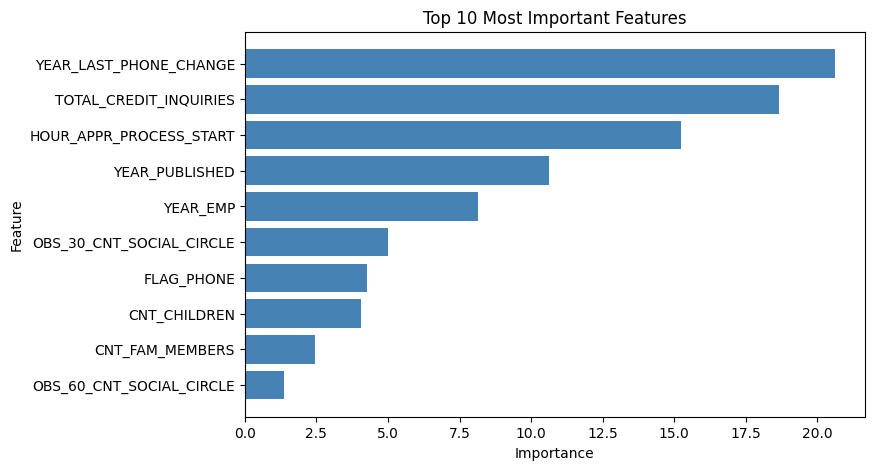

In [ ]:
# Ambil nilai feature importance
feature_importance = cat.feature_importances_

# Gabungkan dengan nama fitur
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))

plt.figure(figsize=(8,5))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='steelblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Most Important Features")
plt.gca().invert_yaxis()
plt.show()

# VI. inference

In [ ]:
print(df_test.columns.tolist())


['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG

In [ ]:
df_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        0.0                         2.0  

[5 rows x 121 columns]

In [ ]:
def preprocess_test(data_test, scaler, label_encoders, numeric_scaling):
    # Feature engineering dulu
    data_test['AGE'] = round((data_test['DAYS_BIRTH'] / 365).abs(), 0).astype(int)
    data_test['YEAR_EMP'] = round((data_test['DAYS_EMPLOYED'] / 365).abs(), 0).astype(int)
    data_test['YEAR_REGISTERED'] = round((data_test['DAYS_REGISTRATION'] / 365).abs(), 0).astype(int)
    data_test['YEAR_PUBLISHED'] = round((data_test['DAYS_ID_PUBLISH'] / 365).abs(), 0).astype(int)
    data_test['YEAR_LAST_PHONE_CHANGE'] = round((data_test['DAYS_LAST_PHONE_CHANGE'] / 365).abs(), 0).astype(int)

    data_test['TOTAL_CREDIT_INQUIRIES'] = (
        data_test['AMT_REQ_CREDIT_BUREAU_HOUR'] +
        data_test['AMT_REQ_CREDIT_BUREAU_DAY'] +
        data_test['AMT_REQ_CREDIT_BUREAU_WEEK'] +
        data_test['AMT_REQ_CREDIT_BUREAU_MON'] +
        data_test['AMT_REQ_CREDIT_BUREAU_QRT'] +
        data_test['AMT_REQ_CREDIT_BUREAU_YEAR']
    )

    data_test = data_test.drop([
        'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
        'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
        'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
        'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
    ], axis=1)

    # Scaling pakai scaler dari train
    data_test[numeric_scaling] = scaler.transform(data_test[numeric_scaling])

    # Encoding pakai label_encoders dari train
    for col, le in label_encoders.items():
        if col in data_test.columns:
            data_test[col] = data_test[col].map(
                lambda s: le.transform([s])[0] if s in le.classes_ else -1
            )

    return data_test

In [ ]:
X_test_ready = preprocess_test(df_test, scaler, label_encoders, numeric_scaling)
y_pred = cat.predict(X_test_ready)


/tmp/ipython-input-911298027.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_test['AGE'] = round((data_test['DAYS_BIRTH'] / 365).abs(), 0).astype(int)
/tmp/ipython-input-911298027.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_test['YEAR_EMP'] = round((data_test['DAYS_EMPLOYED'] / 365).abs(), 0).astype(int)
/tmp/ipython-input-911298027.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all col

In [ ]:
data_test_result = df_test.copy()

data_test_result['TARGET'] = y_pred

In [ ]:
result = data_test_result[['SK_ID_CURR', 'TARGET']]
result.head()

SK_ID_CURR  TARGET
0      100001       0
1      100005       0
2      100013       0
3      100028       0
4      100038       0

In [ ]:
#simpan hasil ke csv
result.to_csv('result.csv', index=False)

In [ ]:
result.nunique()

SK_ID_CURR    48744
TARGET            2
dtype: int64

In [ ]:
count_1 = (result['TARGET'] == 1).sum()
count_0 = (result['TARGET'] == 0).sum()

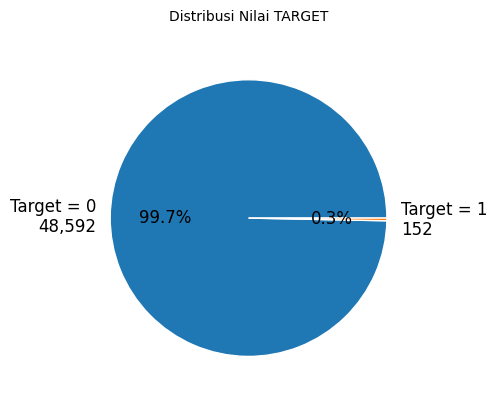

In [ ]:
plt.figure(figsize=(5,5))
plt.pie([count_0, count_1],
        labels=[f'Target = 0\n{count_0:,}', f'Target = 1\n{count_1:,}'],
        autopct='%1.1f%%',
        textprops={'fontsize':12},
        colors=['#1f77b4','#ff7f0e'],
        wedgeprops={'linewidth':1, 'edgecolor':'white'})

plt.title('Distribusi Nilai TARGET\n', fontsize=10)
plt.tight_layout()
plt.show()